In [1]:
import numpy as np,pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import f_oneway,chi2_contingency

warnings.filterwarnings('ignore')
pd.set_option('max_columns',200)
pd.set_option('max_colwidth',200)
pd.set_option('max_rows',200)

In [2]:
train = pd.read_csv('../dataset/train.csv')
test = pd.read_csv('../dataset/test.csv')
train.head()

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_cs_0,0,0,1,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_cs_0,0,0,1,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_cs_0,0,0,1,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991405,-159.314686,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_cs_0,0,0,1,0-4


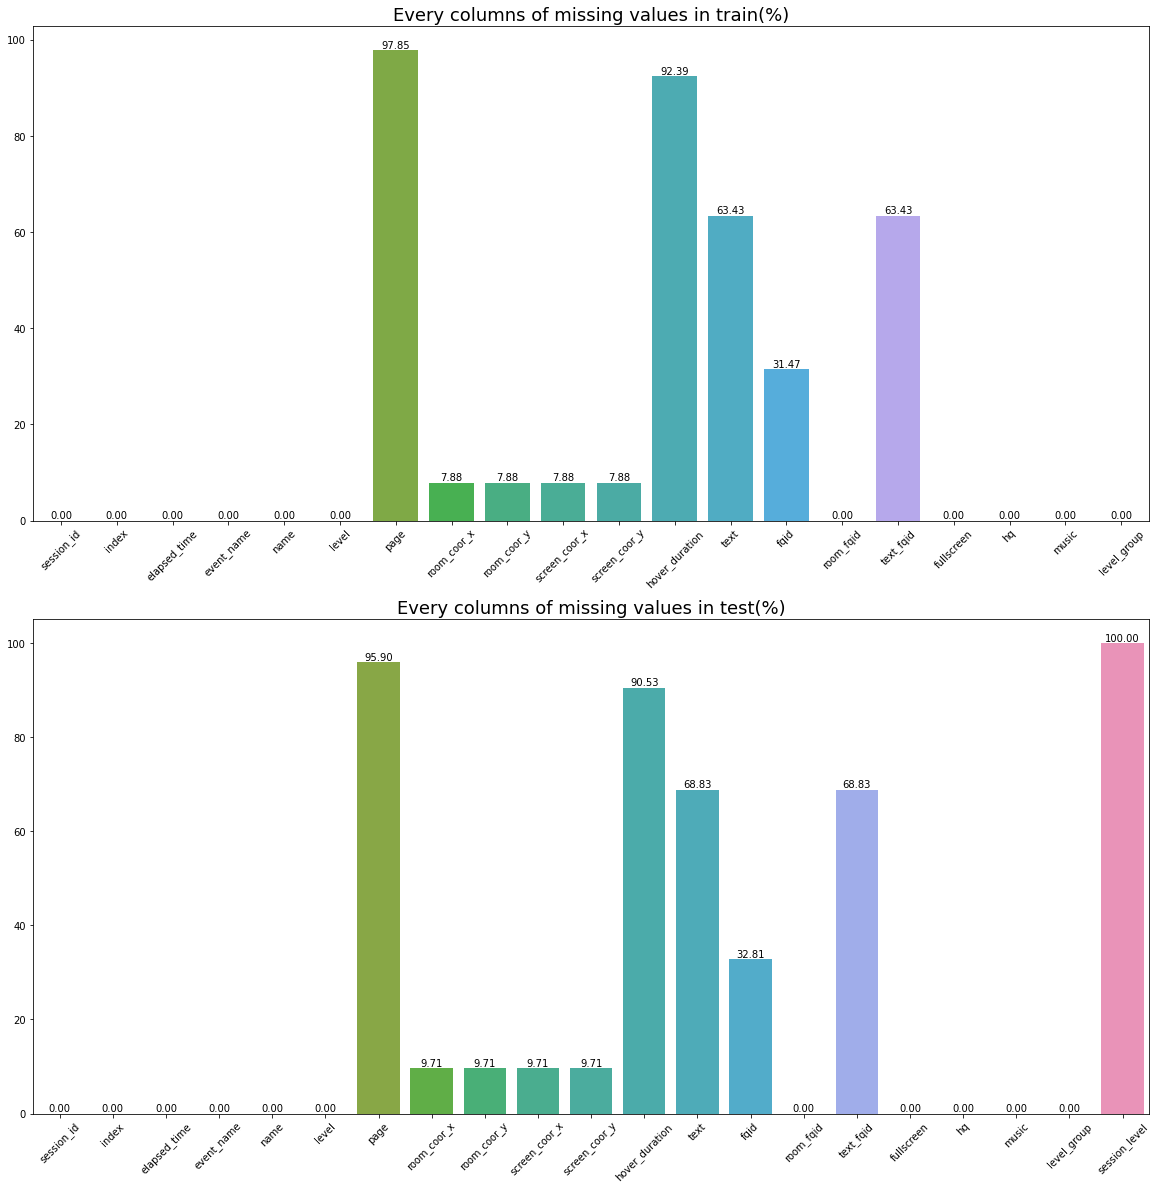

In [3]:
train_missing = train.isnull().sum()/len(train) * 100
test_missing = test.isnull().sum()/len(test) * 100
fig,axs = plt.subplots(2,1,figsize = (20,20))
g1 = sns.barplot(x=train_missing.index,y=train_missing.values,ax=axs[0])
g1.set_title('Every columns of missing values in train(%)',fontsize=18)
g1.bar_label(g1.containers[0],labels=[f'{x.get_height():.2f}' for x in g1.containers[0]])
g1.xaxis.set_tick_params(rotation=45)
g2 = sns.barplot(x=test_missing.index,y=test_missing.values,ax=axs[1])
g2.set_title('Every columns of missing values in test(%)',fontsize=18)
g2.bar_label(g2.containers[0],labels=[f'{x.get_height():.2f}' for x in g2.containers[0]])
g2.xaxis.set_tick_params(rotation=45)
plt.show()

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26296946 entries, 0 to 26296945
Data columns (total 20 columns):
 #   Column          Dtype  
---  ------          -----  
 0   session_id      int64  
 1   index           int64  
 2   elapsed_time    int64  
 3   event_name      object 
 4   name            object 
 5   level           int64  
 6   page            float64
 7   room_coor_x     float64
 8   room_coor_y     float64
 9   screen_coor_x   float64
 10  screen_coor_y   float64
 11  hover_duration  float64
 12  text            object 
 13  fqid            object 
 14  room_fqid       object 
 15  text_fqid       object 
 16  fullscreen      int64  
 17  hq              int64  
 18  music           int64  
 19  level_group     object 
dtypes: float64(6), int64(7), object(7)
memory usage: 3.9+ GB


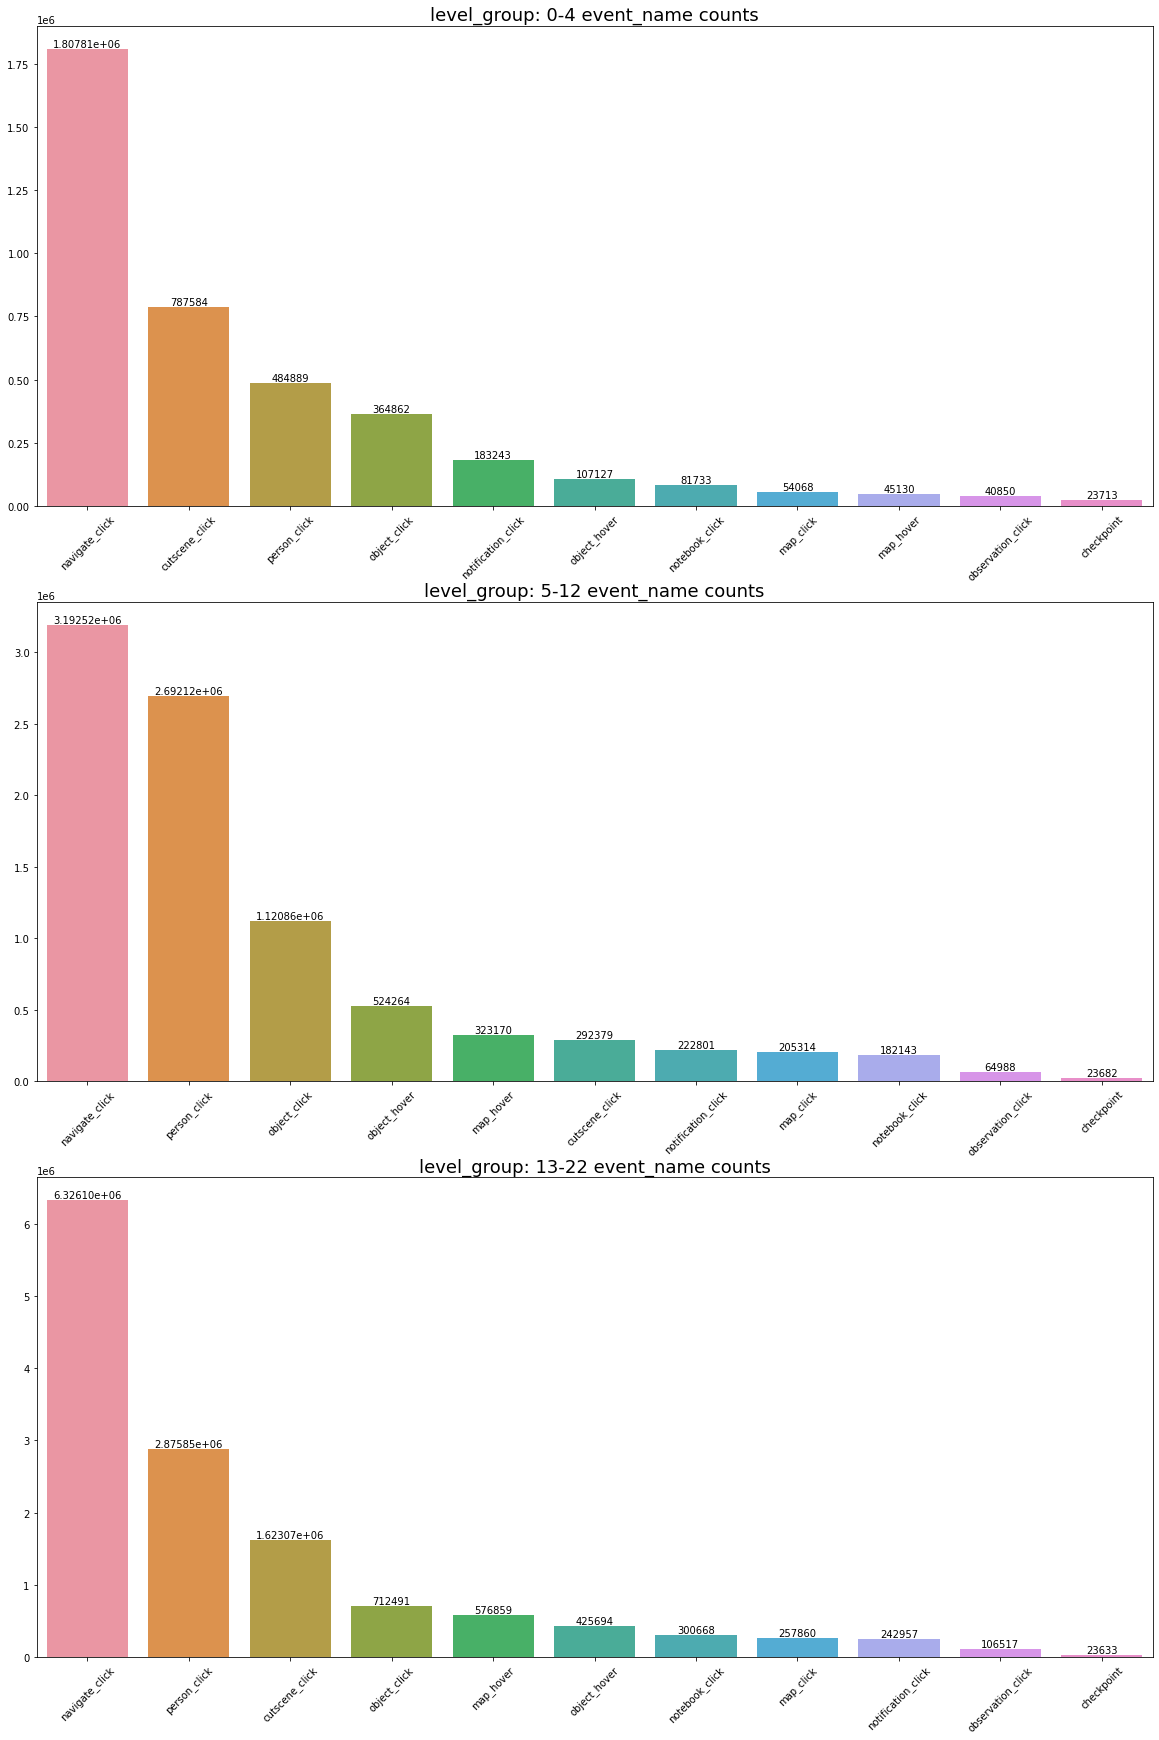

                                df        sum_sq       mean_sq    F  PR(>F)
C(event_name)                 10.0  3.908856e+13  3.908856e+12  0.0     NaN
C(level_group)                 2.0  4.095085e+12  2.047543e+12  0.0     NaN
C(event_name):C(level_group)  20.0  1.164100e+13  5.820498e+11  0.0     NaN
Residual                       0.0  1.512672e-16           inf  NaN     NaN


In [5]:
level_groups = train['level_group'].unique().tolist()
fig,axs = plt.subplots(3,1,figsize=(20,30))
for lg in level_groups:
    temp = train[train['level_group']==lg]['event_name'].value_counts()
    g = sns.barplot(x = temp.index,y = temp.values,ax=axs[level_groups.index(lg)])
    g.set_title('level_group: {} event_name counts'.format(lg),fontsize=18)
    g.bar_label(g.containers[0])
    g.xaxis.set_tick_params(rotation=45)
plt.show()
table = train.groupby(by=['event_name','level_group'])['session_id'].agg('count').reset_index().rename(columns={'session_id':'counts'})
event_name_f = anova_lm(ols('counts~C(event_name)*C(level_group)',data=table).fit())
print(event_name_f)
del level_groups,fig,axs,g,table,event_name_f

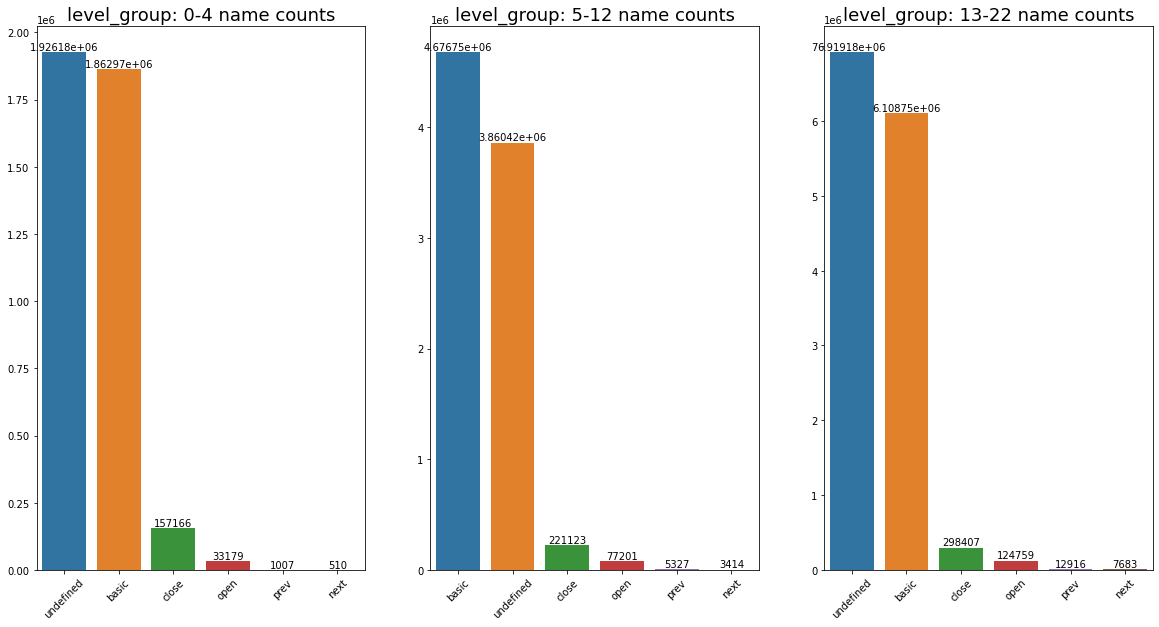

Variance analysis result of name：
                          df        sum_sq       mean_sq    F  PR(>F)
C(name)                  5.0  6.889319e+13  1.377864e+13  0.0     NaN
C(level_group)           2.0  7.507656e+12  3.753828e+12  0.0     NaN
C(name):C(level_group)  10.0  1.451403e+13  1.451403e+12  0.0     NaN
Residual                 0.0  6.711211e-17           inf  NaN     NaN


In [6]:
level_groups = train['level_group'].unique().tolist()
fig,axs = plt.subplots(1,3,figsize=(20,10))
for lg in level_groups:
    temp = train[train['level_group']==lg]['name'].value_counts()
    g = sns.barplot(x = temp.index,y = temp.values,ax=axs[level_groups.index(lg)])
    g.set_title('level_group: {} name counts'.format(lg),fontsize=18)
    g.bar_label(g.containers[0],label=[f'{x.get_height():.1f}' for x in g.containers[0]])
    g.xaxis.set_tick_params(rotation=45)
plt.show()
table = train.groupby(by=['name','level_group'])['session_id'].agg('count').reset_index().rename(columns={'session_id':'counts'})
name_anova = anova_lm(ols('counts~C(name)*C(level_group)',data=table).fit())
print('Variance analysis result of name：')
print(name_anova)
del level_groups,fig,axs,g

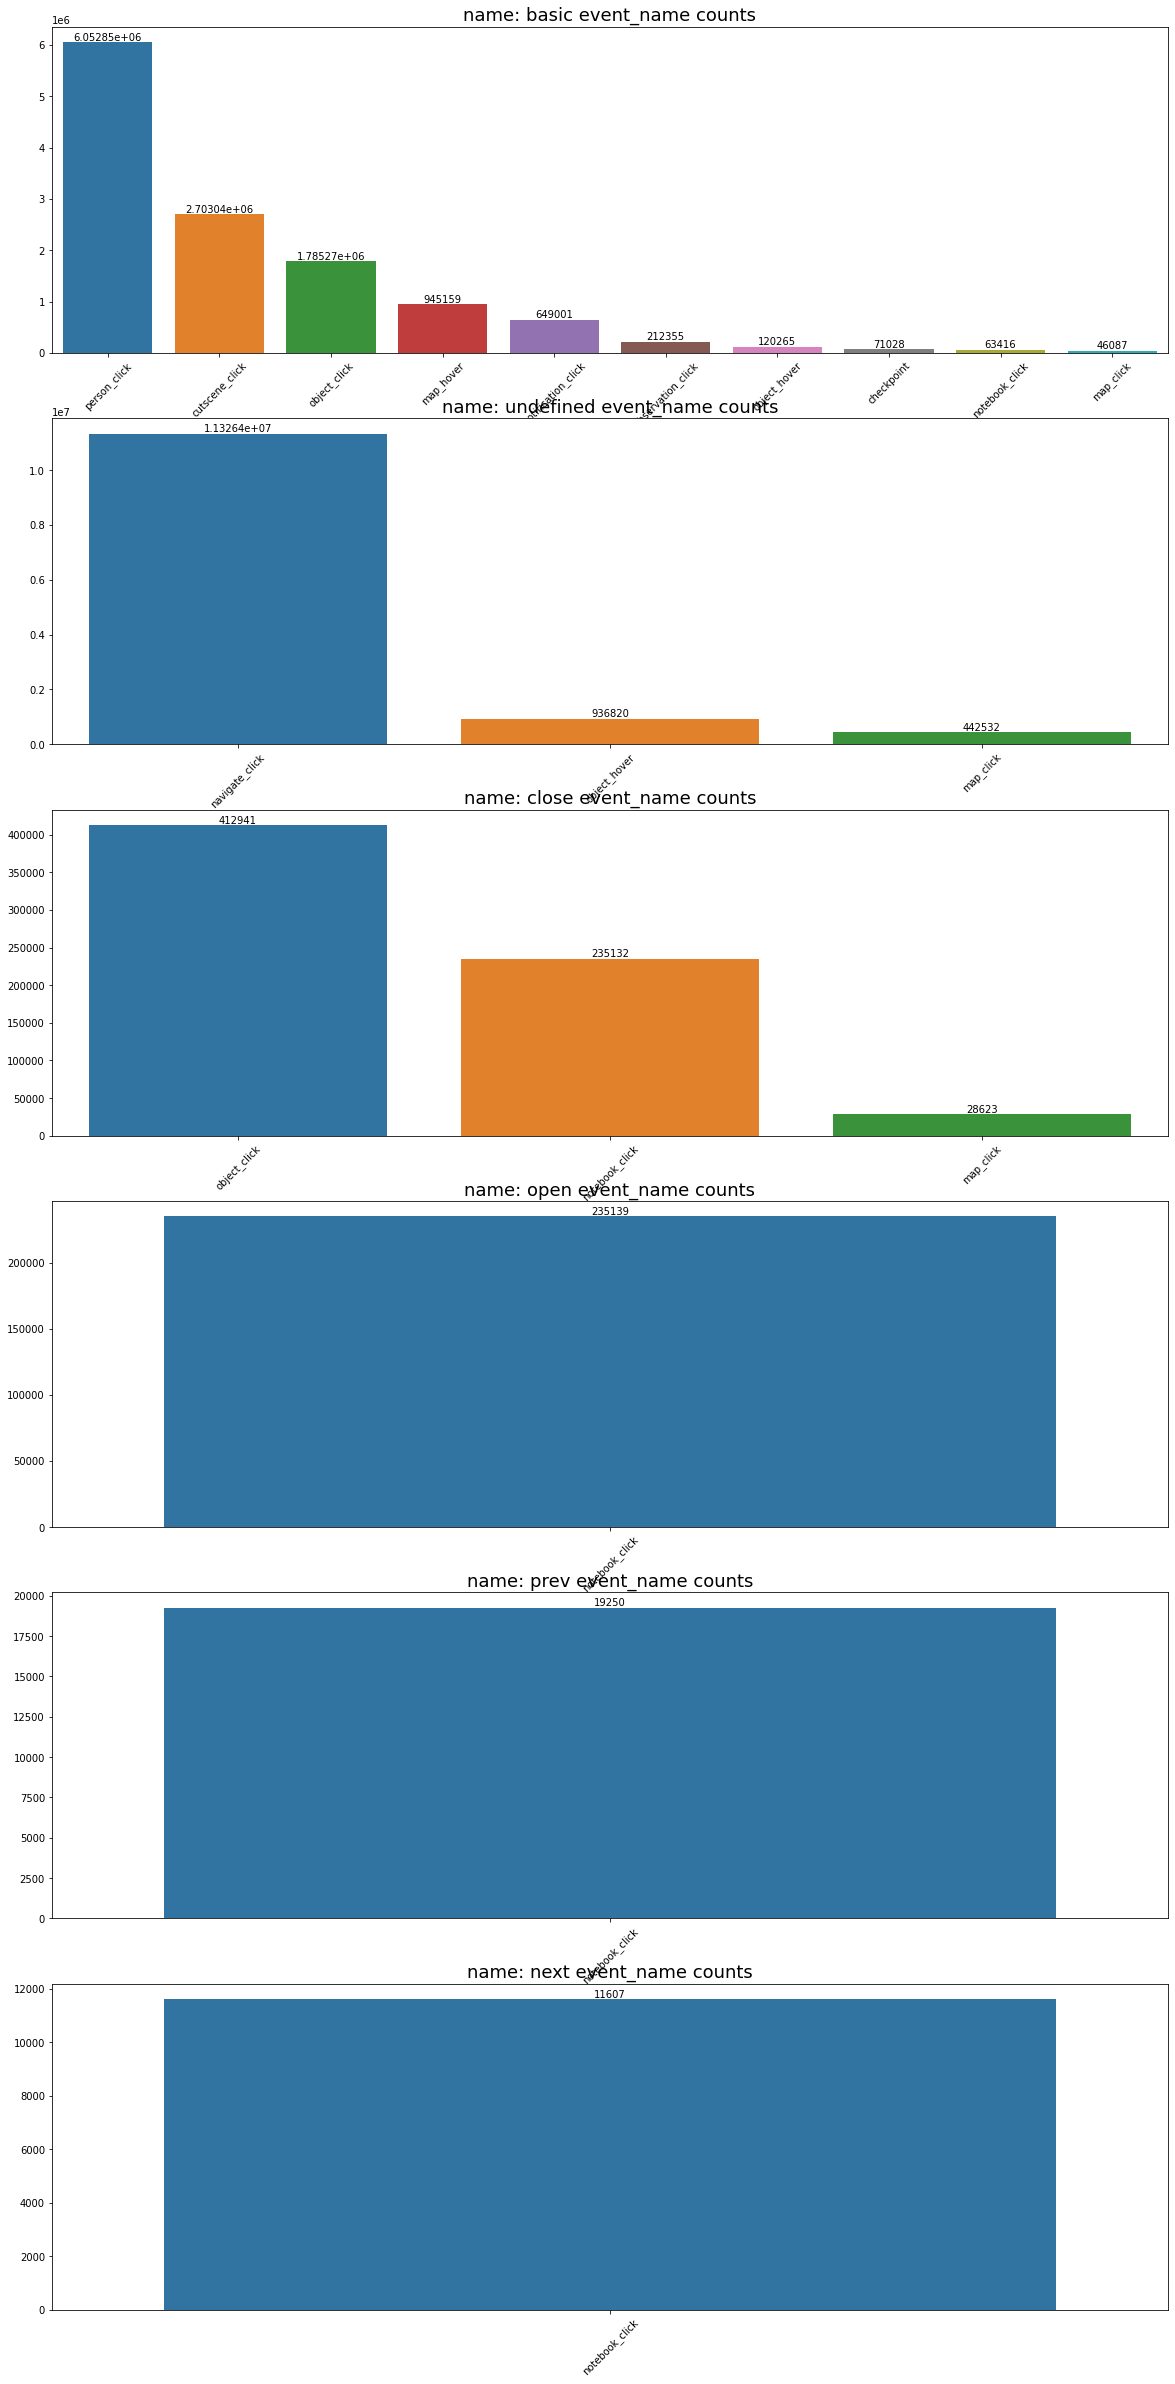

In [7]:
name = train['name'].unique().tolist()
fig,axs = plt.subplots(len(name),1,figsize=(20,7*len(name)))
for n in name:
    temp = train[train['name']==n]['event_name'].value_counts()
    g = sns.barplot(x = temp.index,y = temp.values,ax=axs[name.index(n)])
    g.set_title('name: {} event_name counts'.format(n),fontsize=18)
    g.bar_label(g.containers[0],label=[f'{x.get_height():.1f}' for x in g.containers[0]])
    g.xaxis.set_tick_params(rotation=45)
plt.show()
del name,fig,axs,g

<Figure size 1440x4320 with 0 Axes>

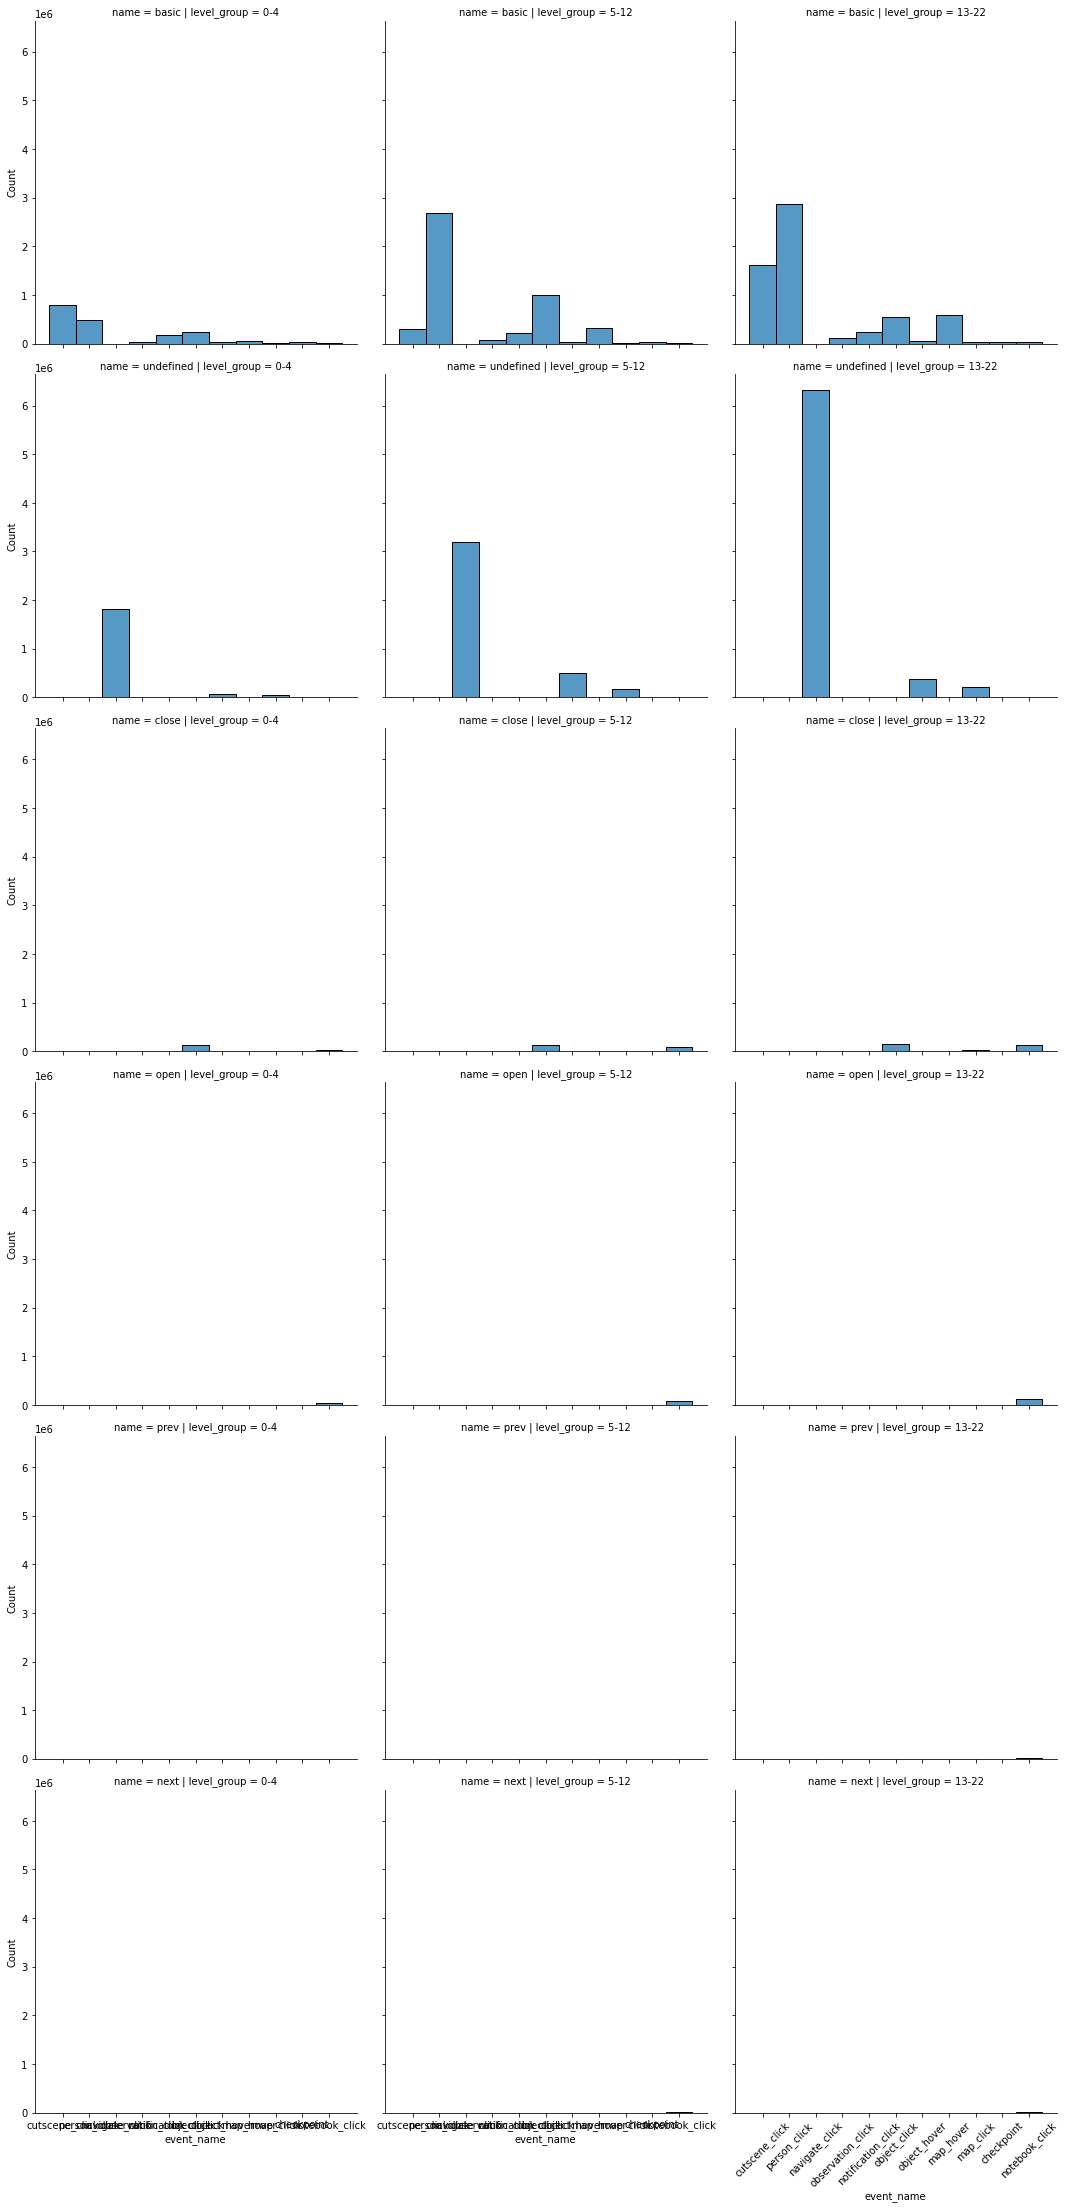

In [8]:
plt.figure(figsize=(20,60))
g = sns.displot(train,x='event_name',col='level_group',row='name')
plt.xticks(rotation=45)
plt.show()
del g

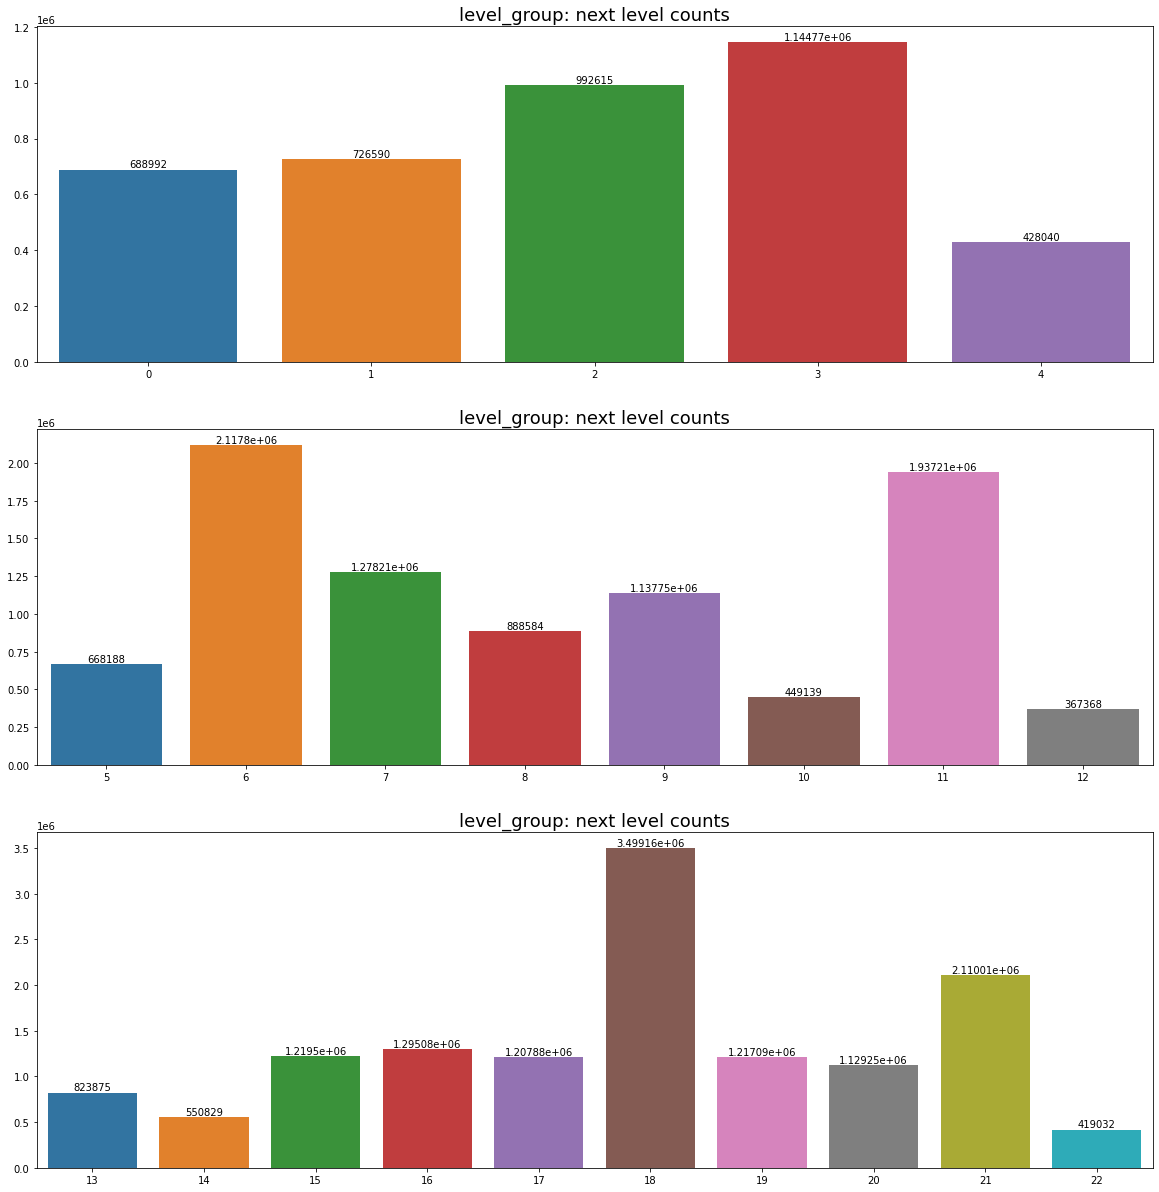

In [9]:
groups = train['level_group'].unique().tolist()
fig,axs = plt.subplots(len(groups),1,figsize=(20,7*len(groups)))
for g in groups:
    temp = train[train['level_group']==g]['level'].value_counts()
    g = sns.barplot(x = temp.index,y = temp.values,ax=axs[groups.index(g)])
    g.set_title('level_group: {} level counts'.format(n),fontsize=18)
    g.bar_label(g.containers[0],label=[f'{x.get_height():.1f}' for x in g.containers[0]])
plt.show()
del groups,fig,axs,g

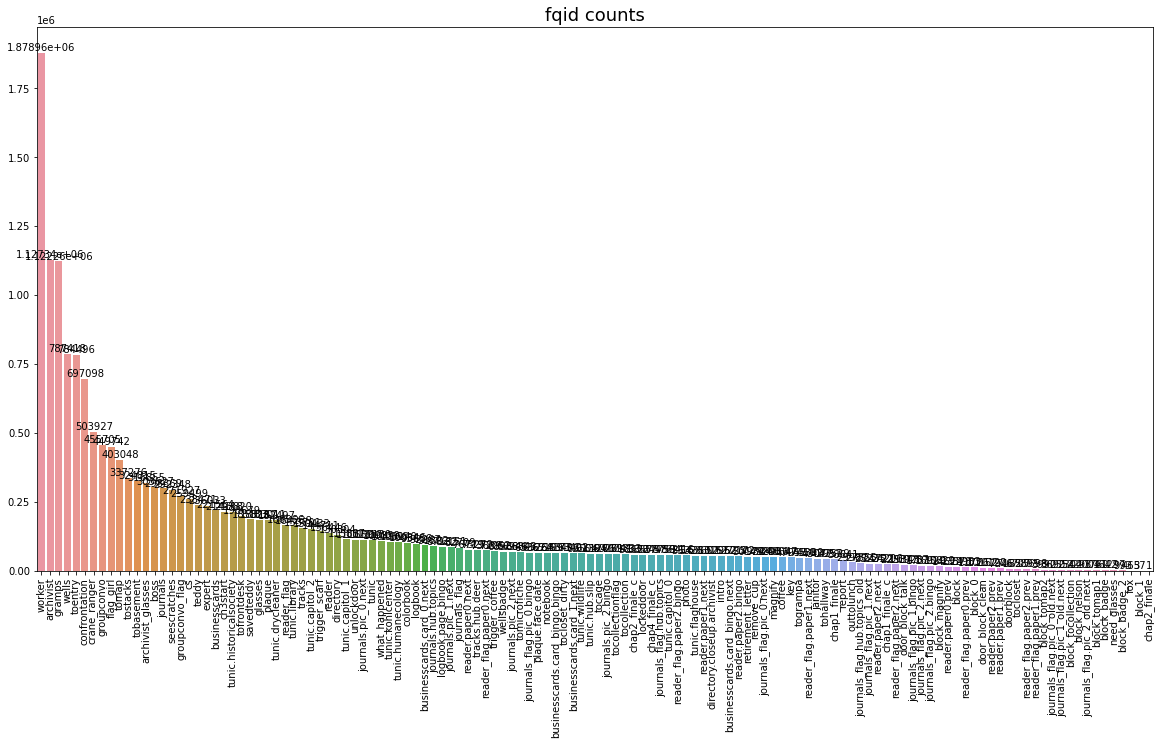

In [10]:
fqid = train['fqid'].value_counts()
plt.figure(figsize=(20,10))
g = sns.barplot(x=fqid.index, y = fqid.values)
g.set_title('fqid counts',fontsize=18)
g.xaxis.set_tick_params(rotation=90)
g.bar_label(g.containers[0])
plt.show()
del fqid,g

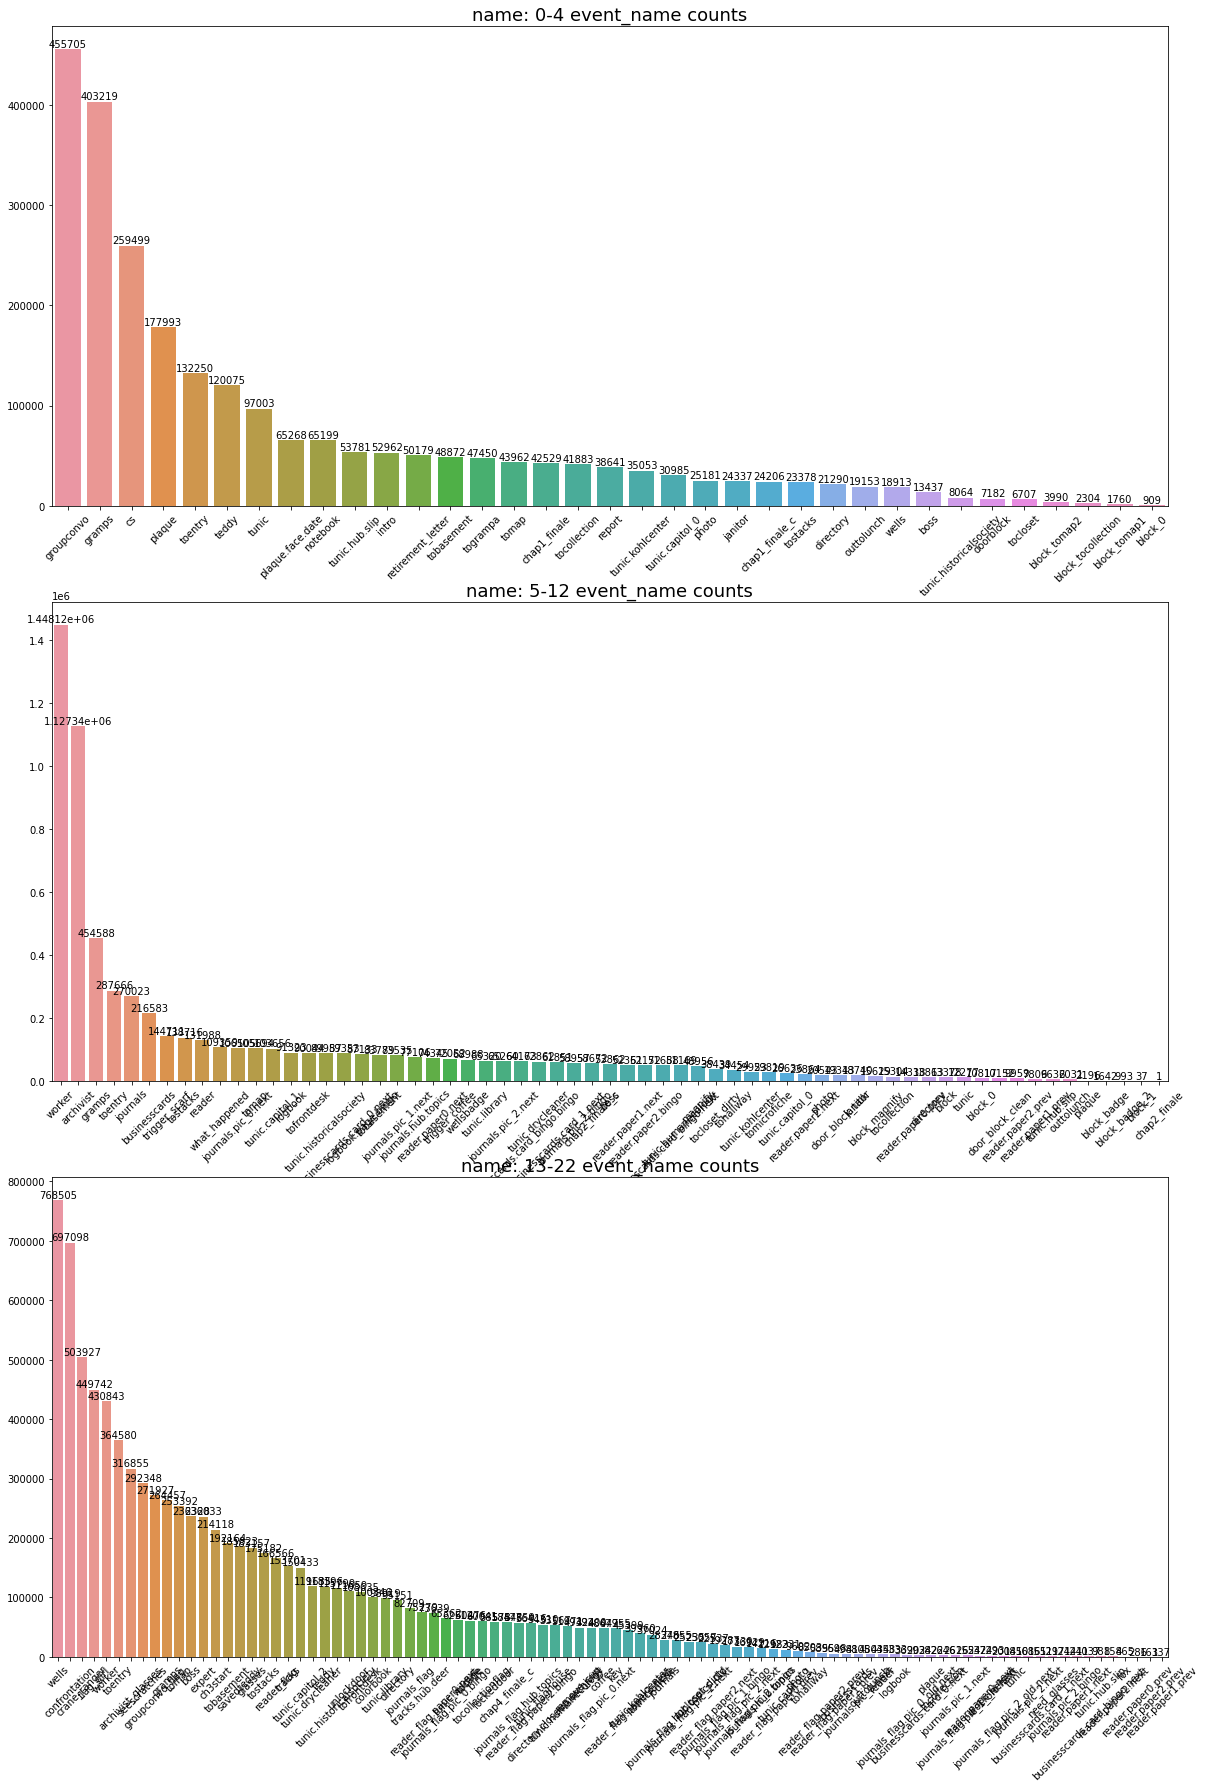

In [11]:
groups = train['level_group'].unique().tolist()
fig,axs = plt.subplots(len(groups),1,figsize=(20,10*len(groups)))
for n in groups:
    temp = train[train['level_group']==n]['fqid'].value_counts()
    g = sns.barplot(x = temp.index,y = temp.values,ax=axs[groups.index(n)])
    g.set_title('name: {} event_name counts'.format(n),fontsize=18)
    g.bar_label(g.containers[0],label=[f'{x.get_height():.1f}' for x in g.containers[0]])
    g.xaxis.set_tick_params(rotation=45)
plt.show()
del groups,fig,axs,g,n

In [12]:
fqid_data = train.copy()
fqid_data['fqid_split_1'] = fqid_data['fqid'].astype(str).map(lambda x:x.split('.')[-1])
fqid_data['fqid_split_0'] = fqid_data['fqid'].astype(str).map(lambda x:x.split('.')[0])

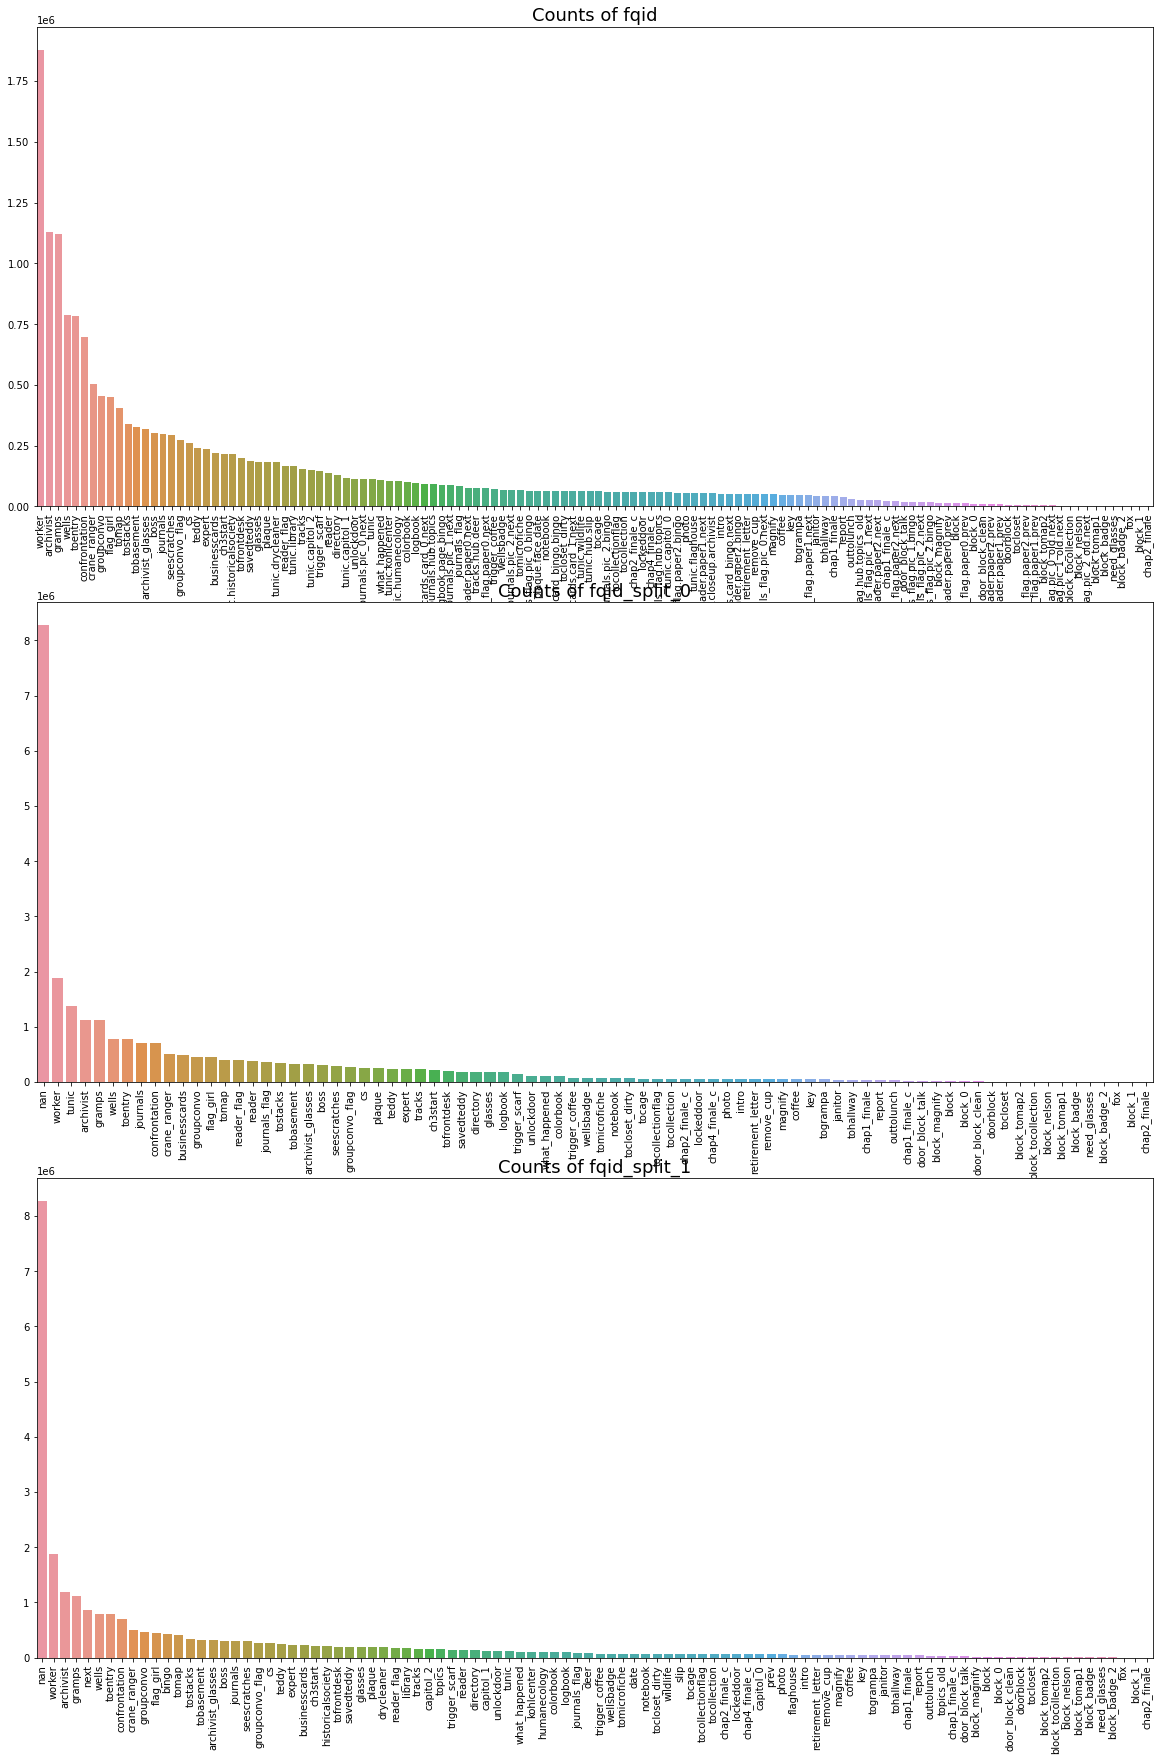

the fqid length:  128
the fqid_split_0 length:  80
the fqid_split_1 length:  98


In [13]:
fqid = fqid_data['fqid'].value_counts()
fqids1 = fqid_data['fqid_split_0'].value_counts()
fqids2 = fqid_data['fqid_split_1'].value_counts()
fig,axs = plt.subplots(3,1,figsize=(20,30))
g = sns.barplot(x = fqid.index, y = fqid.values, ax=axs[0])
g.set_title('Counts of fqid',fontsize=18)
g.xaxis.set_tick_params(rotation=90)

g1 = sns.barplot(x = fqids1.index, y = fqids1.values, ax=axs[1])
g1.set_title('Counts of fqid_split_0',fontsize=18)
g1.xaxis.set_tick_params(rotation=90)

g2 = sns.barplot(x = fqids2.index, y = fqids2.values, ax=axs[2])
g2.set_title('Counts of fqid_split_1',fontsize=18)
g2.xaxis.set_tick_params(rotation=90)
plt.show()
print('the fqid length: ',len(fqid))
print('the fqid_split_0 length: ',len(fqids1))
print('the fqid_split_1 length: ',len(fqids2))
del fqid,fqids1,fqids2

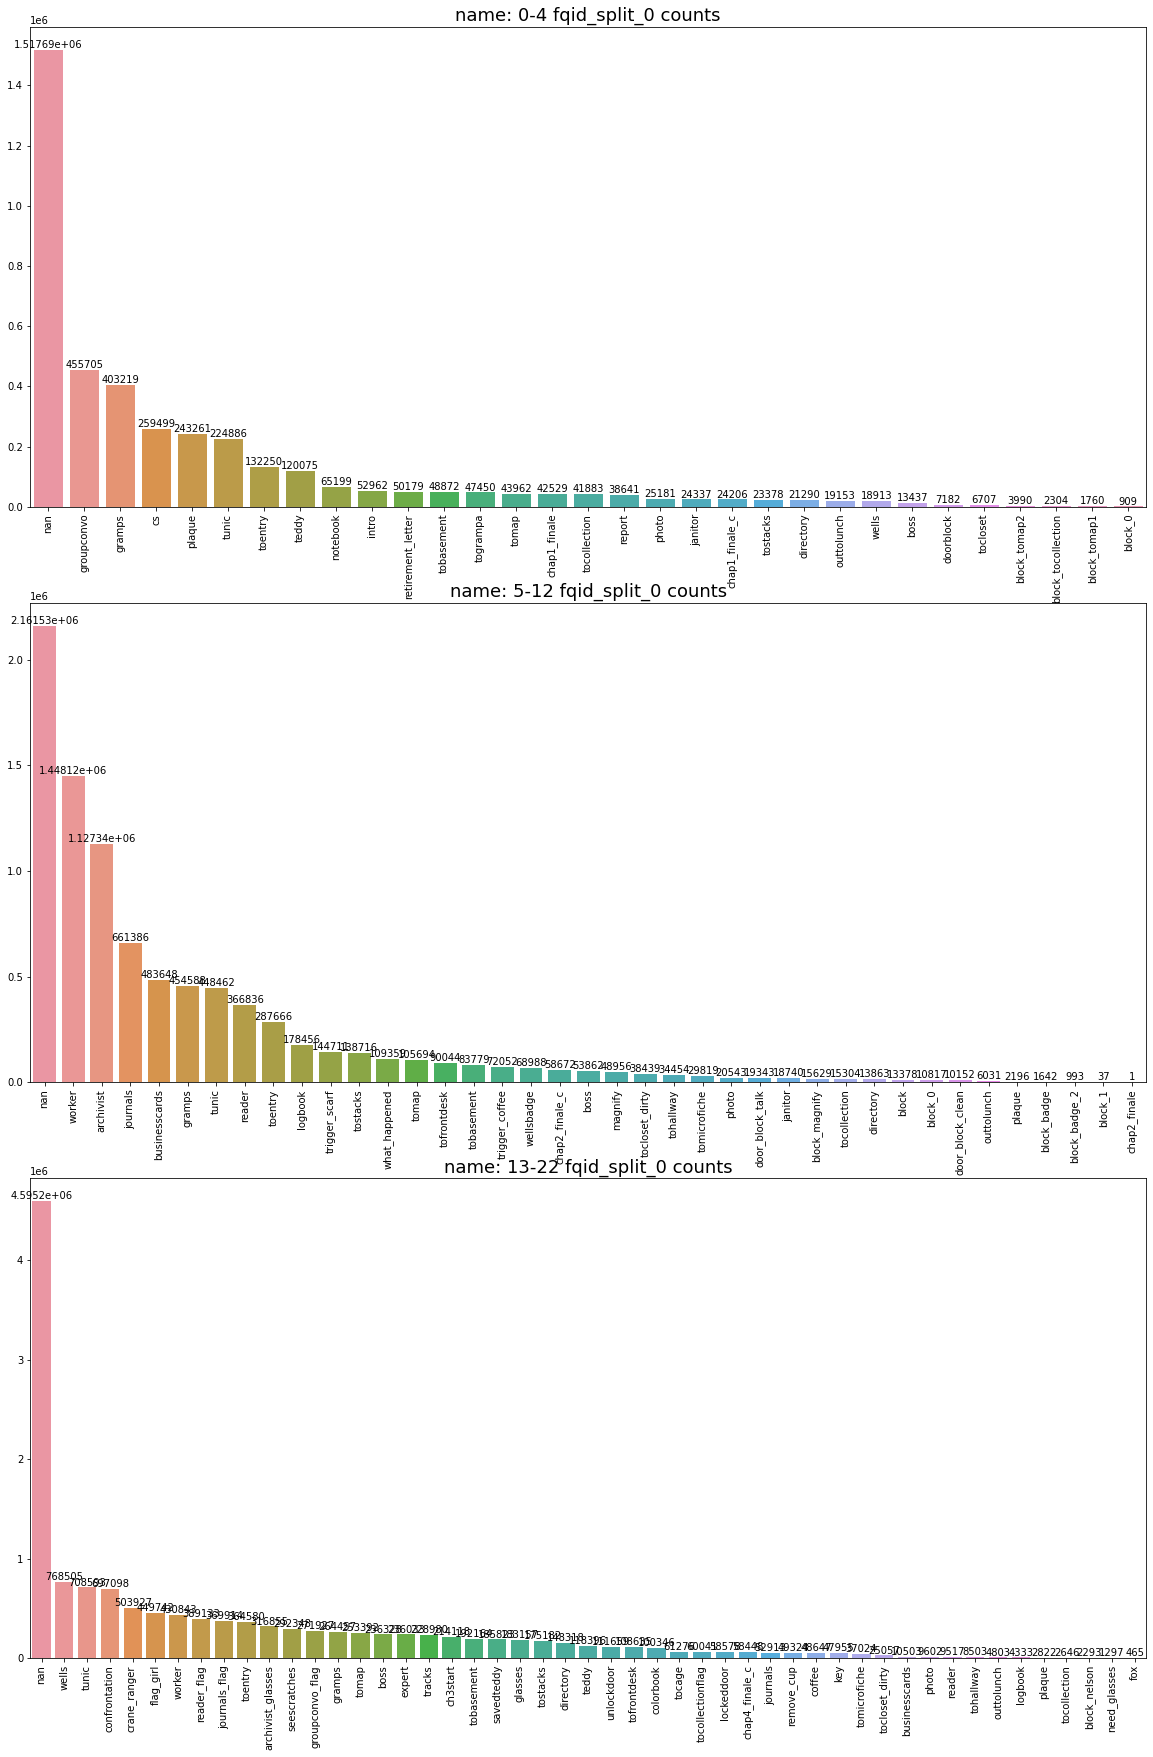

In [14]:
groups = train['level_group'].unique().tolist()
fig,axs = plt.subplots(len(groups),1,figsize=(20,10*len(groups)))
for n in groups:
    temp = fqid_data[fqid_data['level_group']==n]['fqid_split_0'].value_counts()
    g = sns.barplot(x = temp.index,y = temp.values,ax=axs[groups.index(n)])
    g.set_title('name: {} fqid_split_0 counts'.format(n),fontsize=18)
    g.bar_label(g.containers[0],label=[f'{x.get_height():.1f}' for x in g.containers[0]])
    g.xaxis.set_tick_params(rotation=90)
plt.show()
del groups,fig,axs,g,n

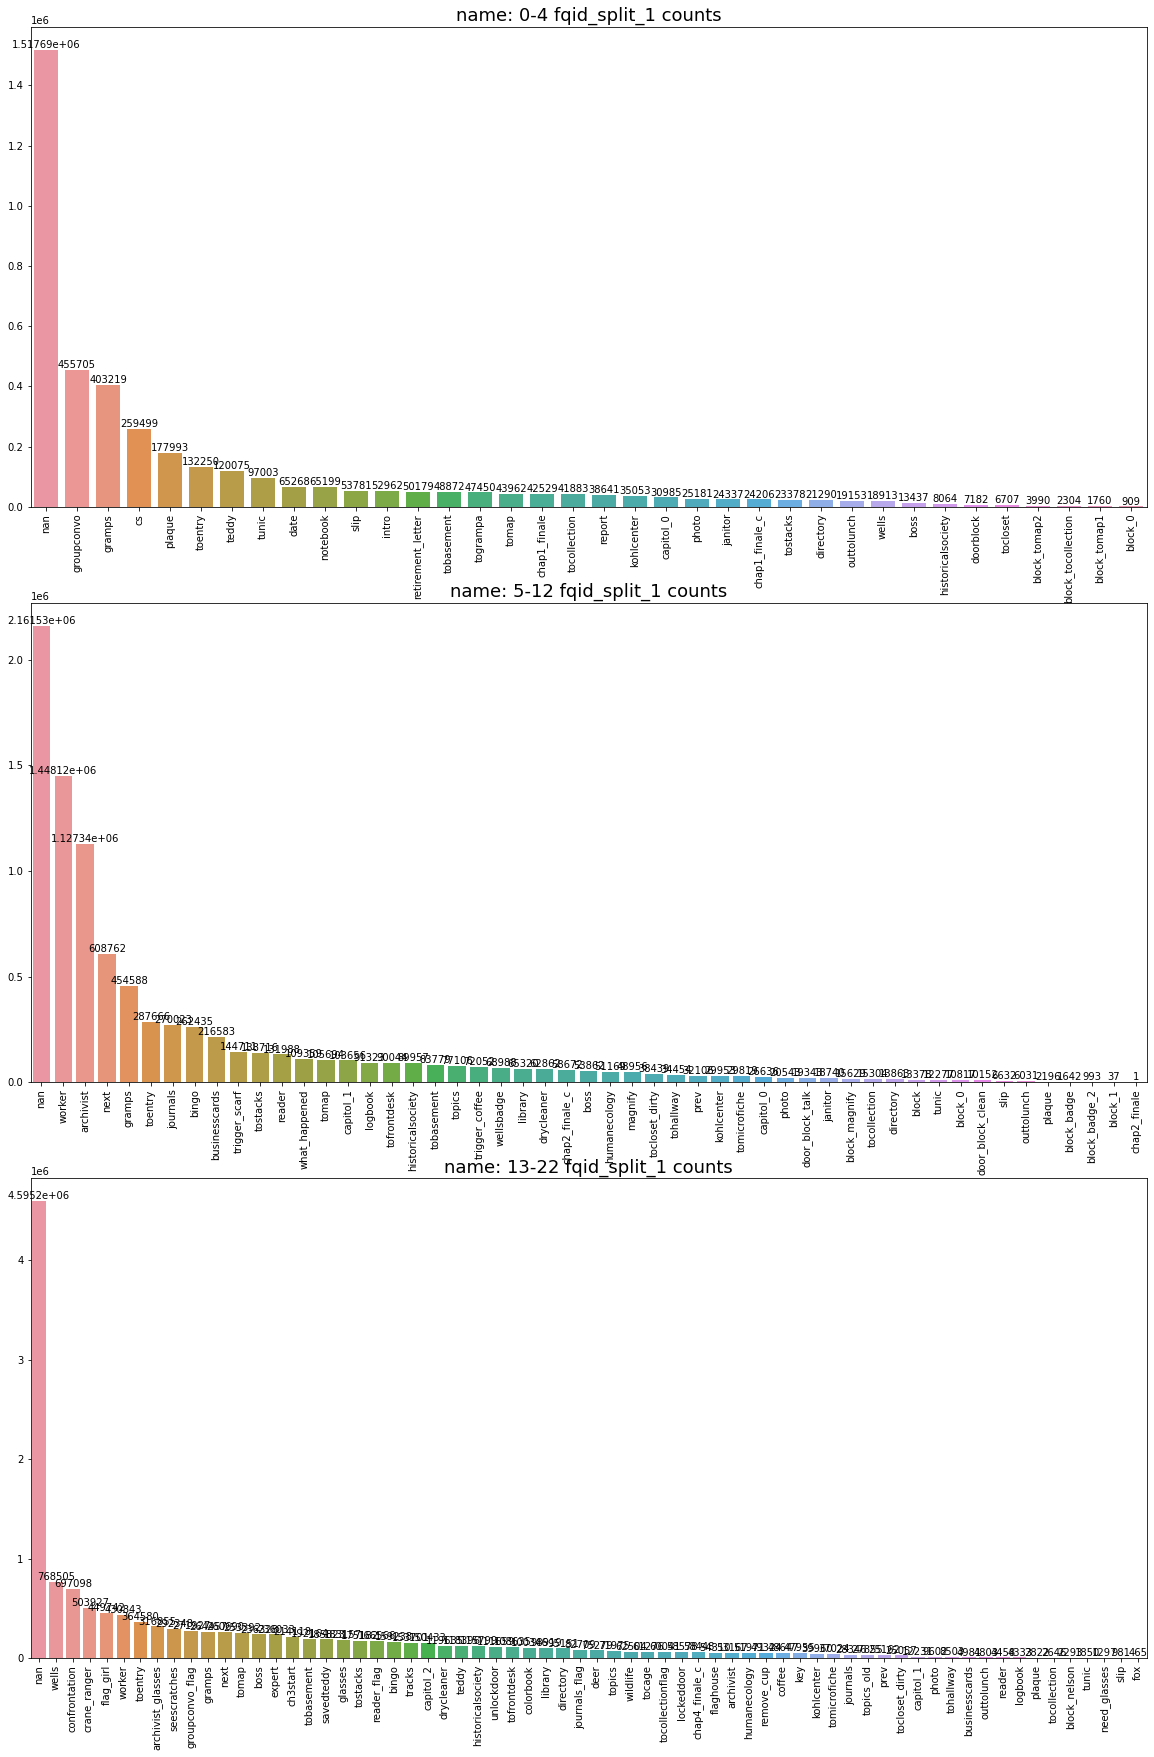

In [15]:
groups = train['level_group'].unique().tolist()
fig,axs = plt.subplots(len(groups),1,figsize=(20,10*len(groups)))
for n in groups:
    temp = fqid_data[fqid_data['level_group']==n]['fqid_split_1'].value_counts()
    g = sns.barplot(x = temp.index,y = temp.values,ax=axs[groups.index(n)])
    g.set_title('name: {} fqid_split_1 counts'.format(n),fontsize=18)
    g.bar_label(g.containers[0],label=[f'{x.get_height():.1f}' for x in g.containers[0]])
    g.xaxis.set_tick_params(rotation=90)
plt.show()
del groups,fig,axs,g,n

KeyError: 'fqid_split_lenth'

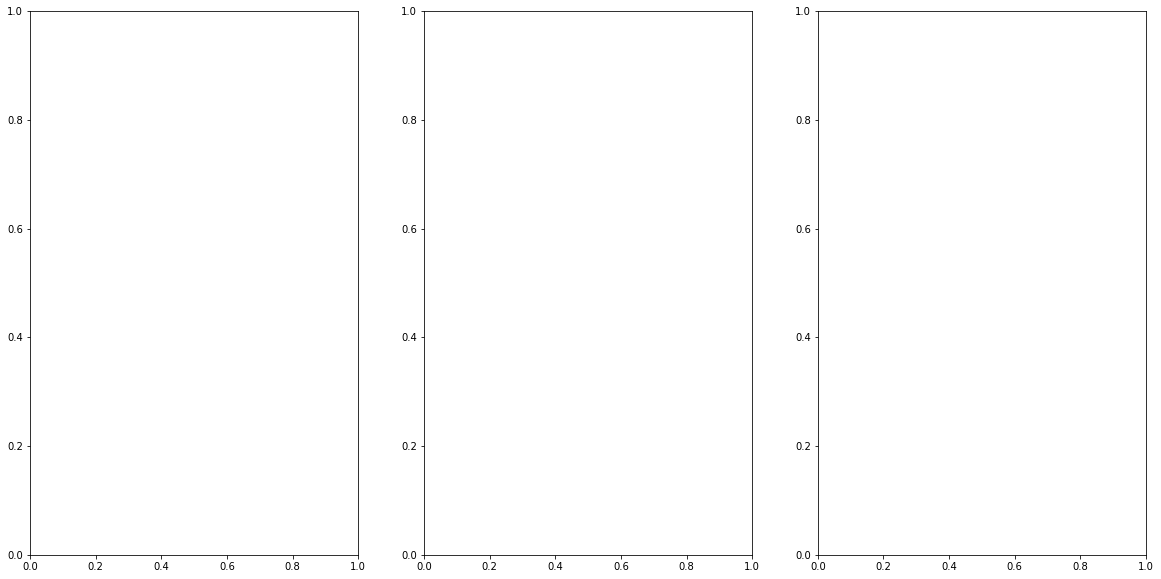

In [16]:
groups = fqid_data['level_group'].unique().tolist()
fig,axs = plt.subplots(1,3,figsize=(20,10))
for n in groups:
    temp = fqid_data[fqid_data['level_group']==n]['fqid_split_lenth'].value_counts()
    g = sns.barplot(x = temp.index,y = temp.values,ax=axs[groups.index(n)])
    g.set_title('name: {} fqid_split_lenth counts'.format(n),fontsize=18)
    g.bar_label(g.containers[0],label=[f'{x.get_height():.1f}' for x in g.containers[0]])
    g.xaxis.set_tick_params(rotation=90)
plt.show()
del groups,fig,axs,g,n,temp

In [17]:
plt.figure(figsize=(20,20))
g = sns.displot(fqid_data,x='event_name',col='level_group',row='fqid_split_lenth')
plt.show()

ValueError: Could not interpret value `fqid_split_lenth` for parameter `row`

<Figure size 1440x1440 with 0 Axes>

In [18]:
train['room_coor'] = np.sqrt(np.power(train['room_coor_x'],2) + np.power(train['room_coor_y'],2))
train['screen_coor'] = np.sqrt(np.power(train['screen_coor_x'],2) + np.power(train['screen_coor_y'],2))
train['screen_room'] = np.sqrt(np.power(train['room_coor_x']-train['screen_coor_x'],2) + 
                             np.power(train['room_coor_y']-train['screen_coor_y'],2))
train.head()

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group,room_coor,screen_coor,screen_room
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4,443.587706,623.246340,1028.222948
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_cs_0,0,0,1,0-4,443.587706,623.246340,1028.222948
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_cs_0,0,0,1,0-4,443.587706,623.246340,1028.222948
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_cs_0,0,0,1,0-4,443.587706,623.246340,1028.222948
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991405,-159.314686,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_cs_0,0,0,1,0-4,442.654572,623.856554,1028.222948


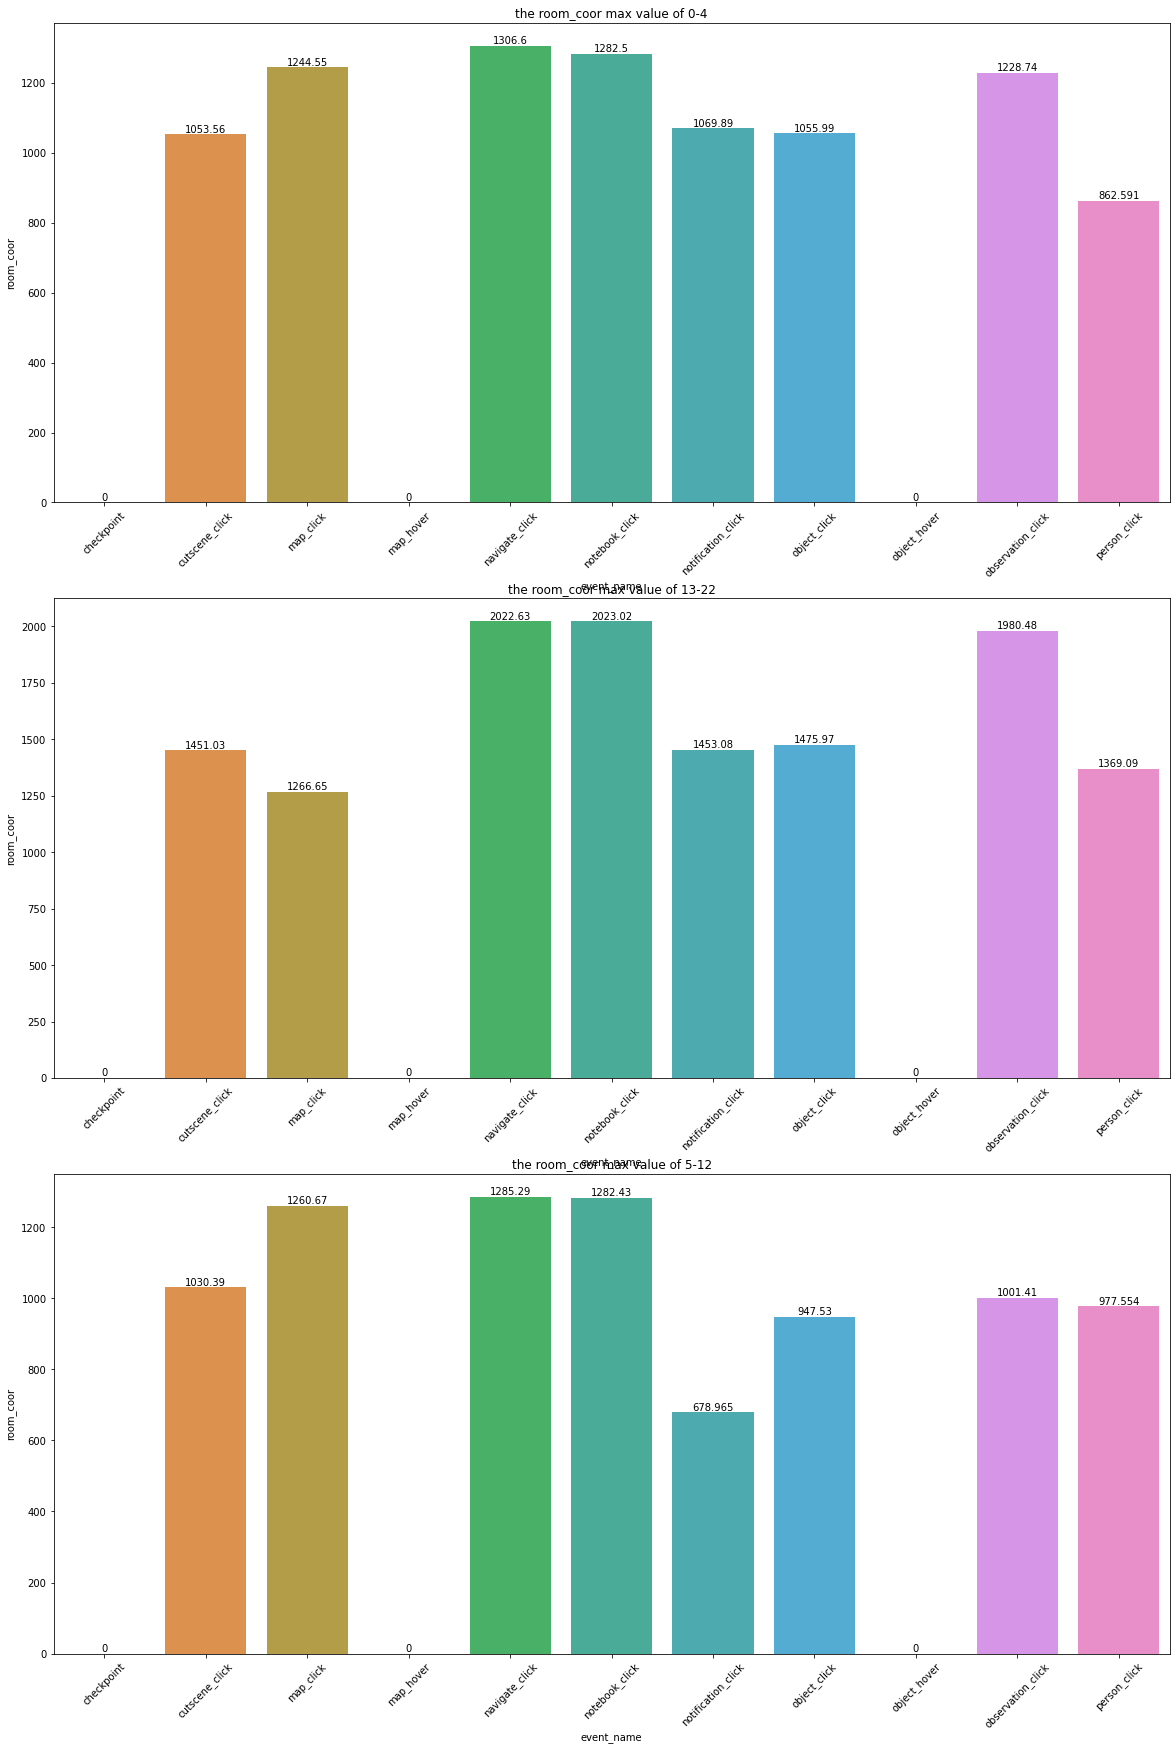

In [21]:
temp = train.groupby(by=['level_group','event_name'])['room_coor'].max().fillna(0).reset_index()
groups = temp['level_group'].unique().tolist()
fig,axs = plt.subplots(3,1,figsize=(20,30))
for n in groups:
    g = sns.barplot(x = temp[temp['level_group']==n]['event_name'],y = temp[temp['level_group']==n]['room_coor'],ax = axs[groups.index(n)])
    g.set_title('the room_coor max value of {}'.format(n))
    g.bar_label(g.containers[0])
    g.xaxis.set_tick_params(rotation=45)
plt.show()
del temp,g

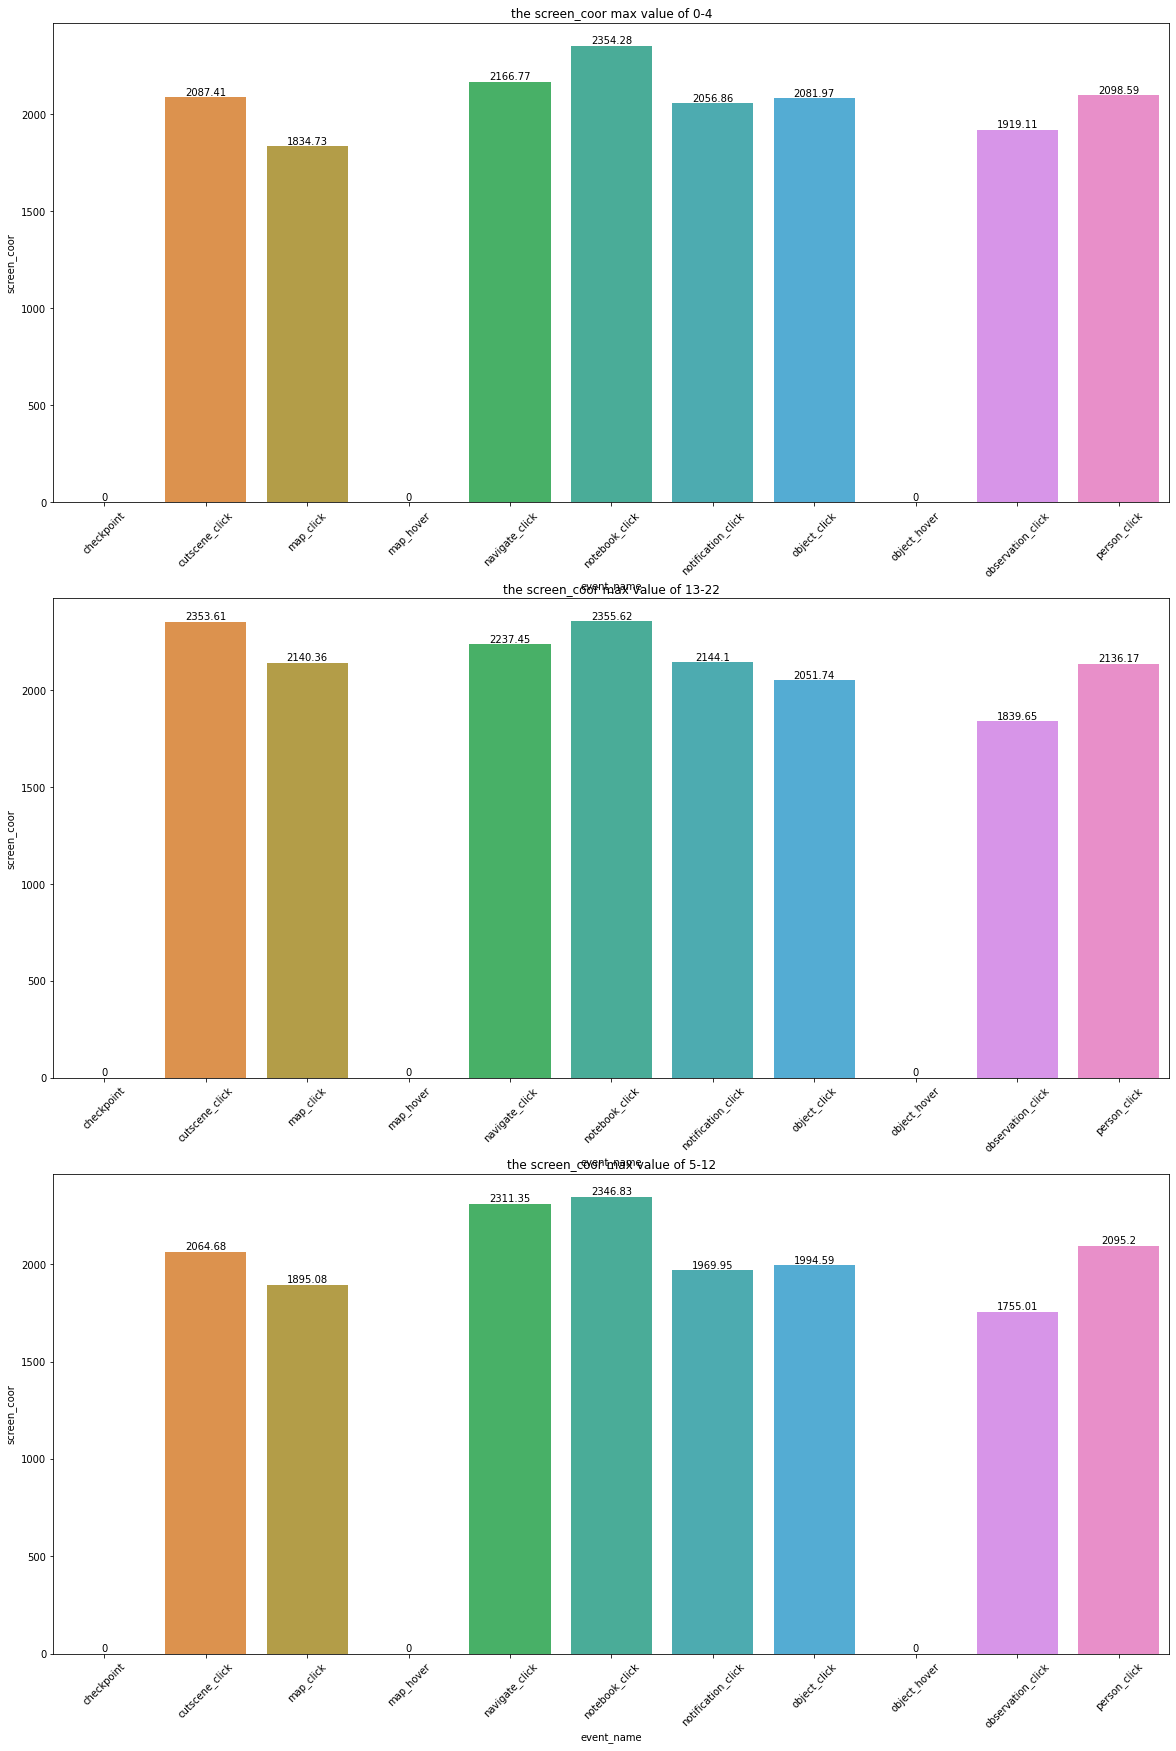

In [24]:
temp = train.groupby(by=['level_group','event_name'])['screen_coor'].max().fillna(0).reset_index()
fig,axs = plt.subplots(3,1,figsize=(20,30))
for n in groups:
    g = sns.barplot(x = temp[temp['level_group']==n]['event_name'],y = temp[temp['level_group']==n]['screen_coor'],ax = axs[groups.index(n)])
    g.set_title('the screen_coor max value of {}'.format(n))
    g.bar_label(g.containers[0])
    g.xaxis.set_tick_params(rotation=45)
plt.show()
del temp,g

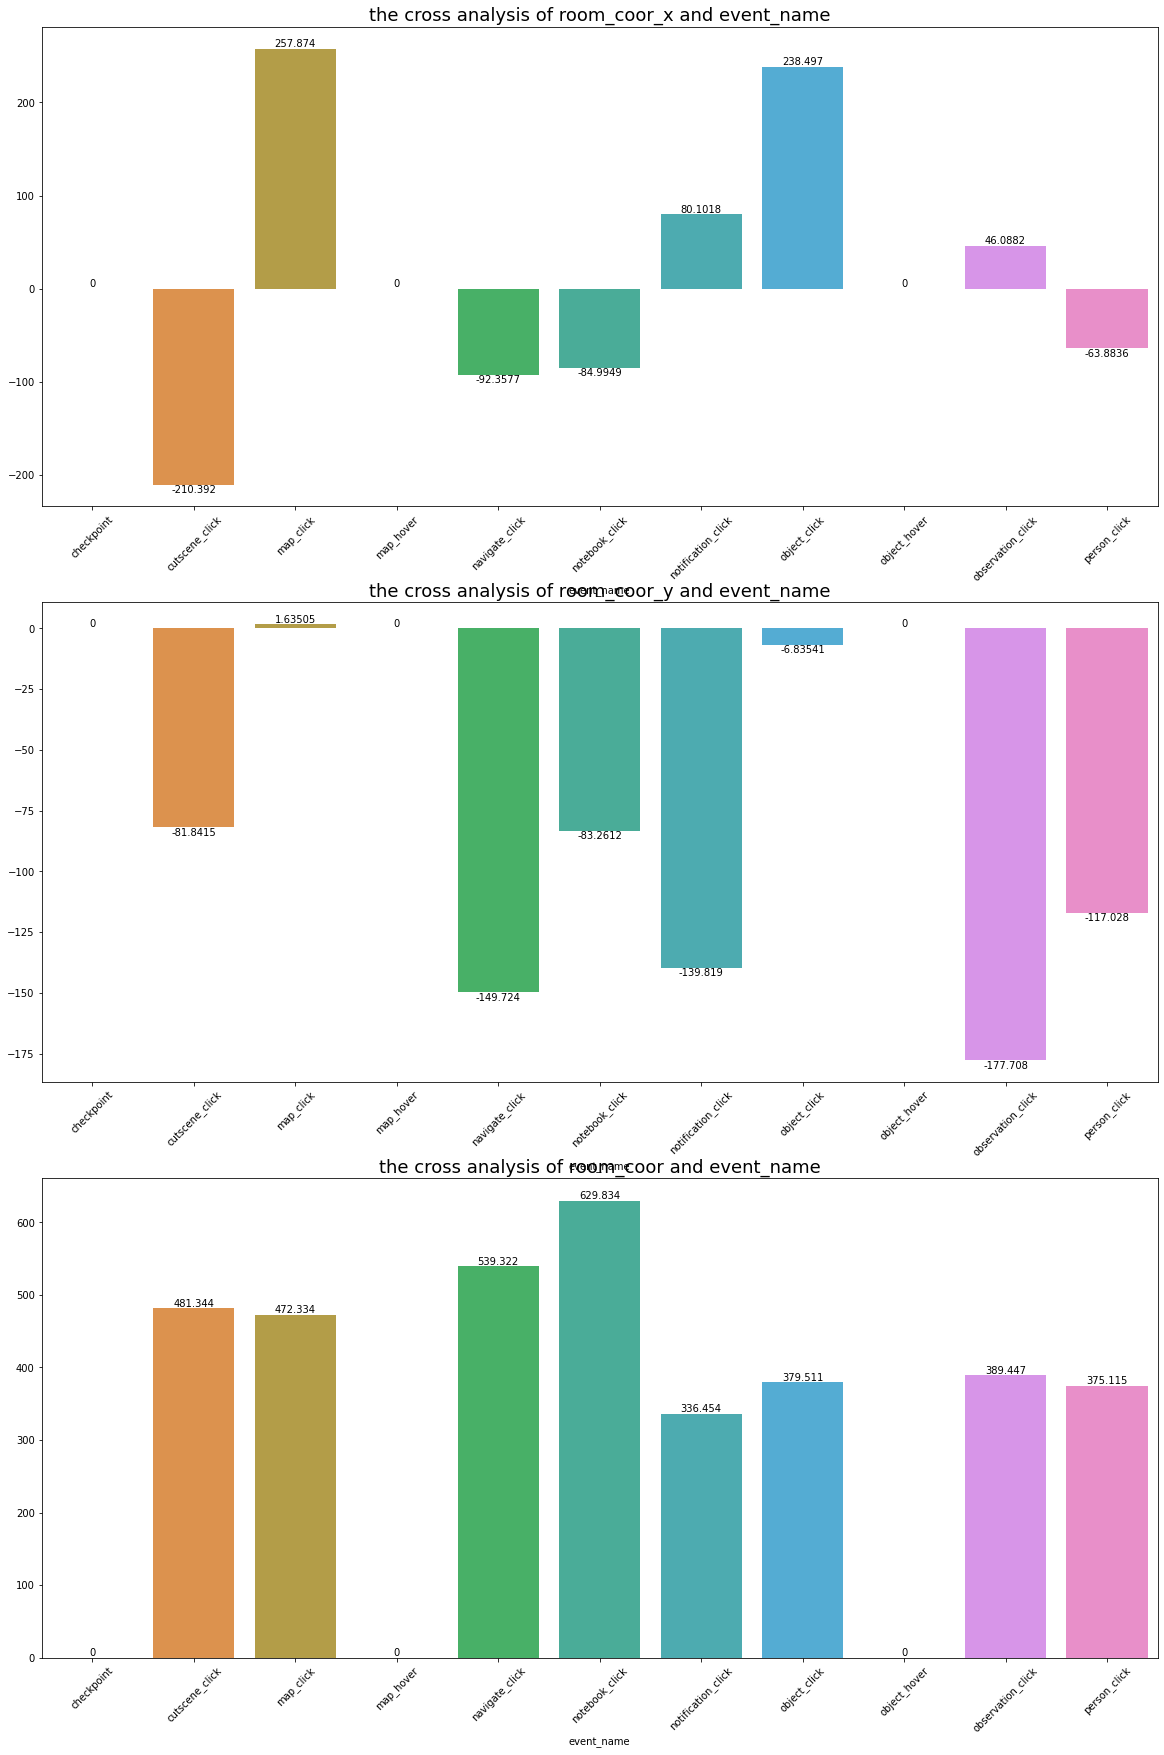

In [27]:
temp_room_x = train.groupby(by=['event_name'])['room_coor_x'].mean().fillna(0)
temp_room_y = train.groupby(by=['event_name'])['room_coor_y'].mean().fillna(0)
temp_room = train.groupby(by=['event_name'])['room_coor'].mean().fillna(0)
fig,axs = plt.subplots(3,1,figsize=(20,30))
g1 = sns.barplot(x = temp_room_x.index, y = temp_room_x.values, ax = axs[0])
g1.set_title('the cross analysis of room_coor_x and event_name',fontsize=18)
g1.bar_label(g1.containers[0])
g1.xaxis.set_tick_params(rotation=45)

g2 = sns.barplot(x = temp_room_y.index, y = temp_room_y.values, ax = axs[1])
g2.set_title('the cross analysis of room_coor_y and event_name',fontsize=18)
g2.bar_label(g2.containers[0])
g2.xaxis.set_tick_params(rotation=45)

g3 = sns.barplot(x = temp_room.index, y = temp_room.values, ax = axs[2])
g3.set_title('the cross analysis of room_coor and event_name',fontsize=18)
g3.bar_label(g3.containers[0])
g3.xaxis.set_tick_params(rotation=45)
plt.show()
del temp_room_x,temp_room_y,temp_room,g1,g2,g3

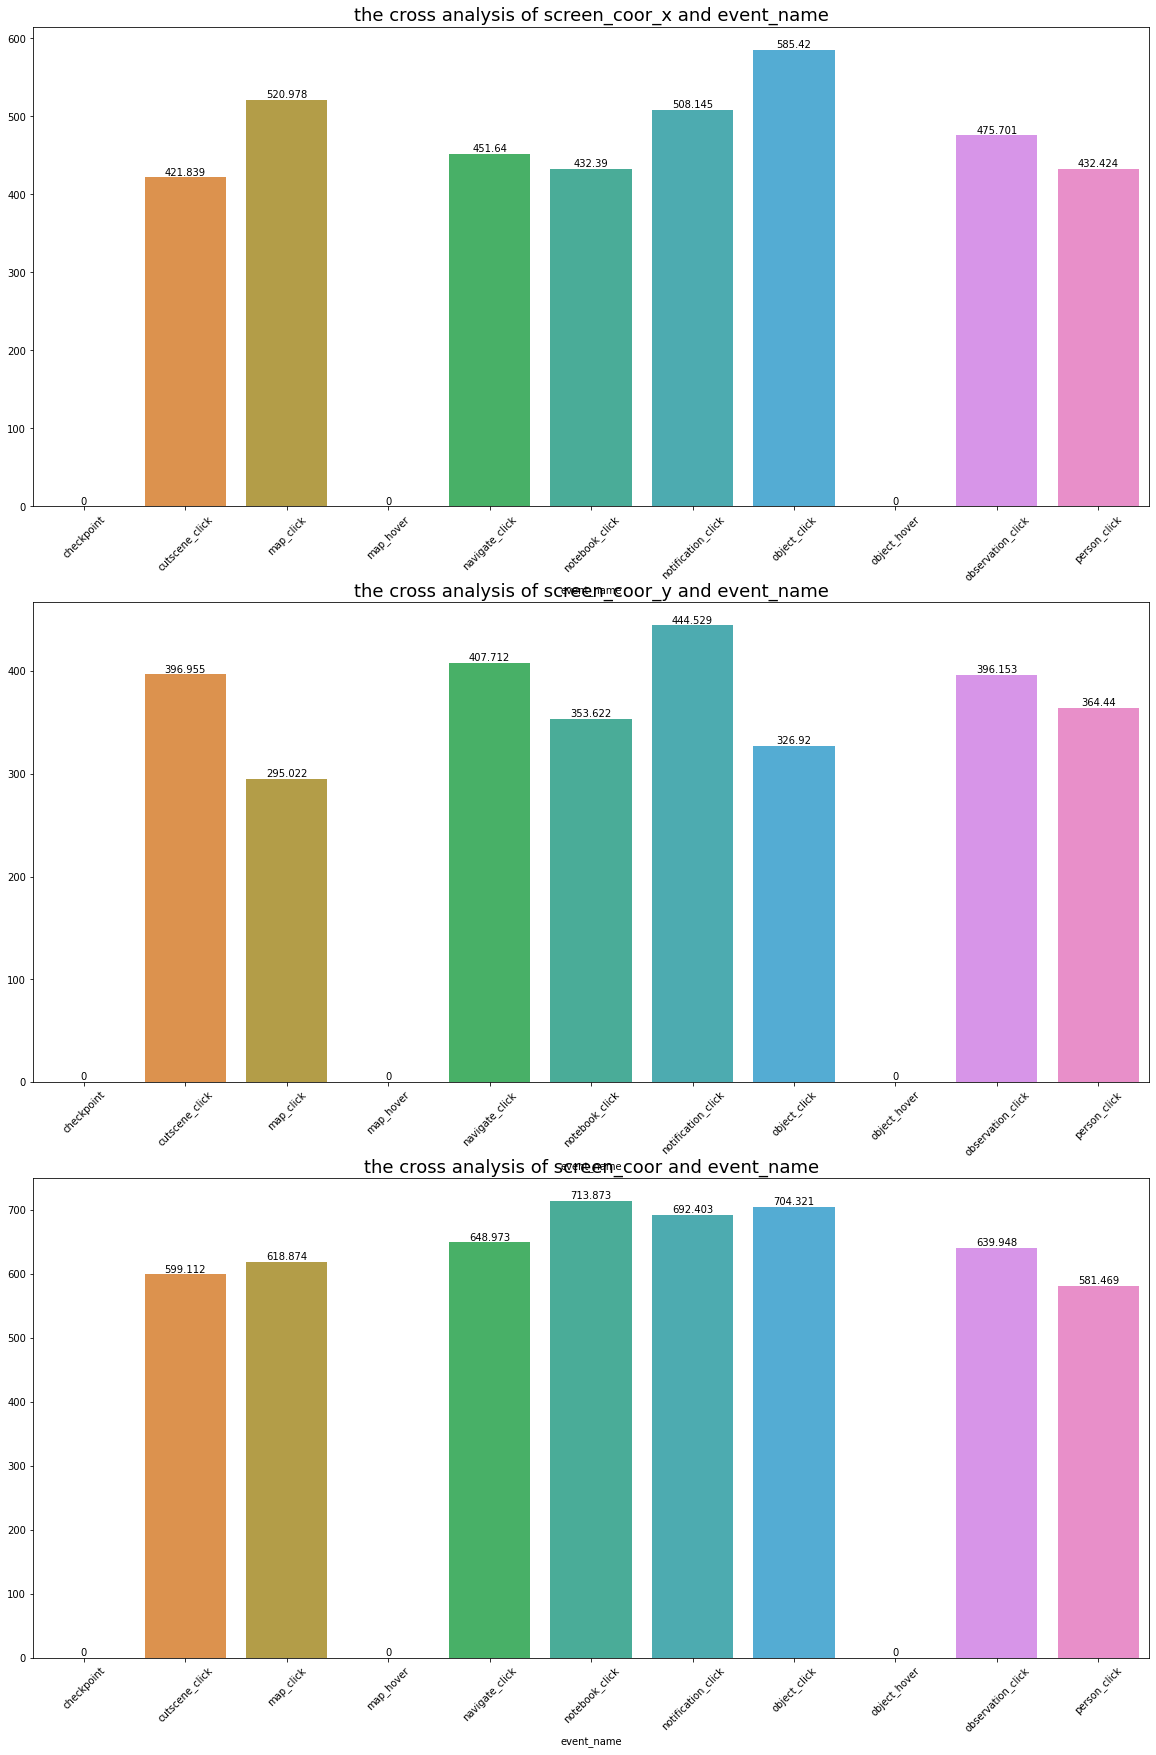

In [28]:
temp_room_x = train.groupby(by=['event_name'])['screen_coor_x'].mean().fillna(0)
temp_room_y = train.groupby(by=['event_name'])['screen_coor_y'].mean().fillna(0)
temp_room = train.groupby(by=['event_name'])['screen_coor'].mean().fillna(0)
fig,axs = plt.subplots(3,1,figsize=(20,30))
g1 = sns.barplot(x = temp_room_x.index, y = temp_room_x.values, ax = axs[0])
g1.set_title('the cross analysis of screen_coor_x and event_name',fontsize=18)
g1.bar_label(g1.containers[0])
g1.xaxis.set_tick_params(rotation=45)

g2 = sns.barplot(x = temp_room_y.index, y = temp_room_y.values, ax = axs[1])
g2.set_title('the cross analysis of screen_coor_y and event_name',fontsize=18)
g2.bar_label(g2.containers[0])
g2.xaxis.set_tick_params(rotation=45)

g3 = sns.barplot(x = temp_room.index, y = temp_room.values, ax = axs[2])
g3.set_title('the cross analysis of screen_coor and event_name',fontsize=18)
g3.bar_label(g3.containers[0])
g3.xaxis.set_tick_params(rotation=45)
plt.show()
del temp_room_x,temp_room_y,temp_room,g1,g2,g3

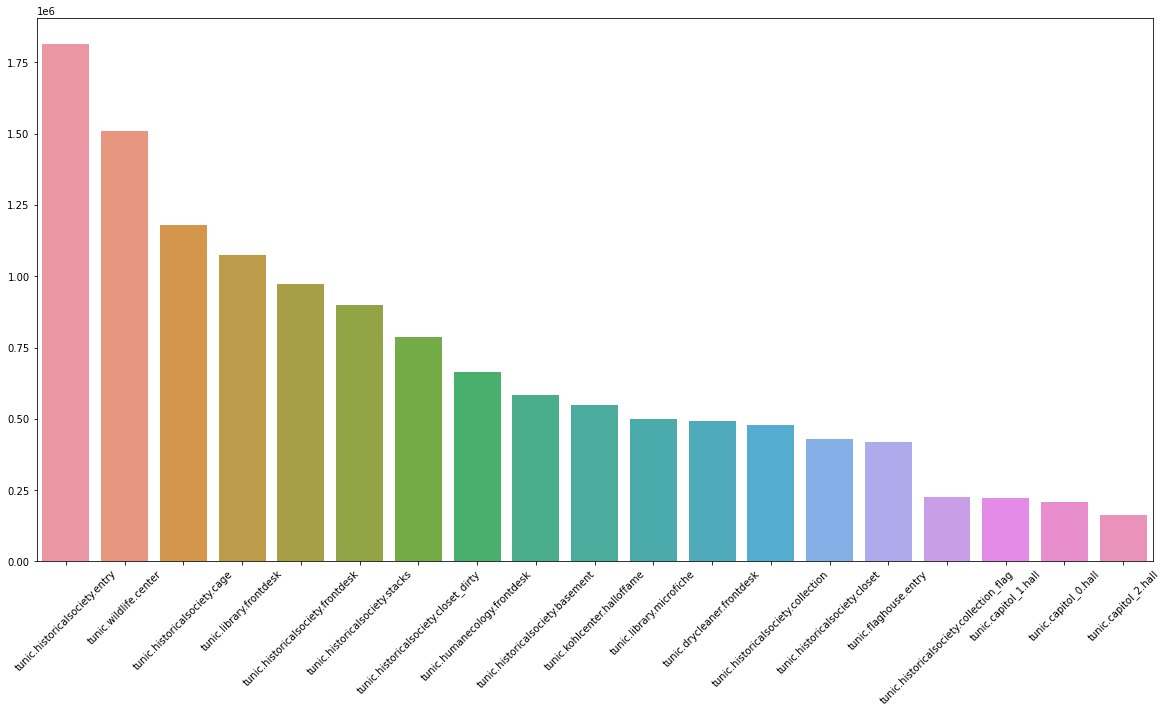

In [42]:
room_fqid_counts = train['room_fqid'].value_counts()
plt.figure(figsize=(20,10))
g = sns.barplot(x = room_fqid_counts.index, y = room_fqid_counts.values)
g.xaxis.set_tick_params(rotation=45)
plt.show()
del room_fqid_counts,g

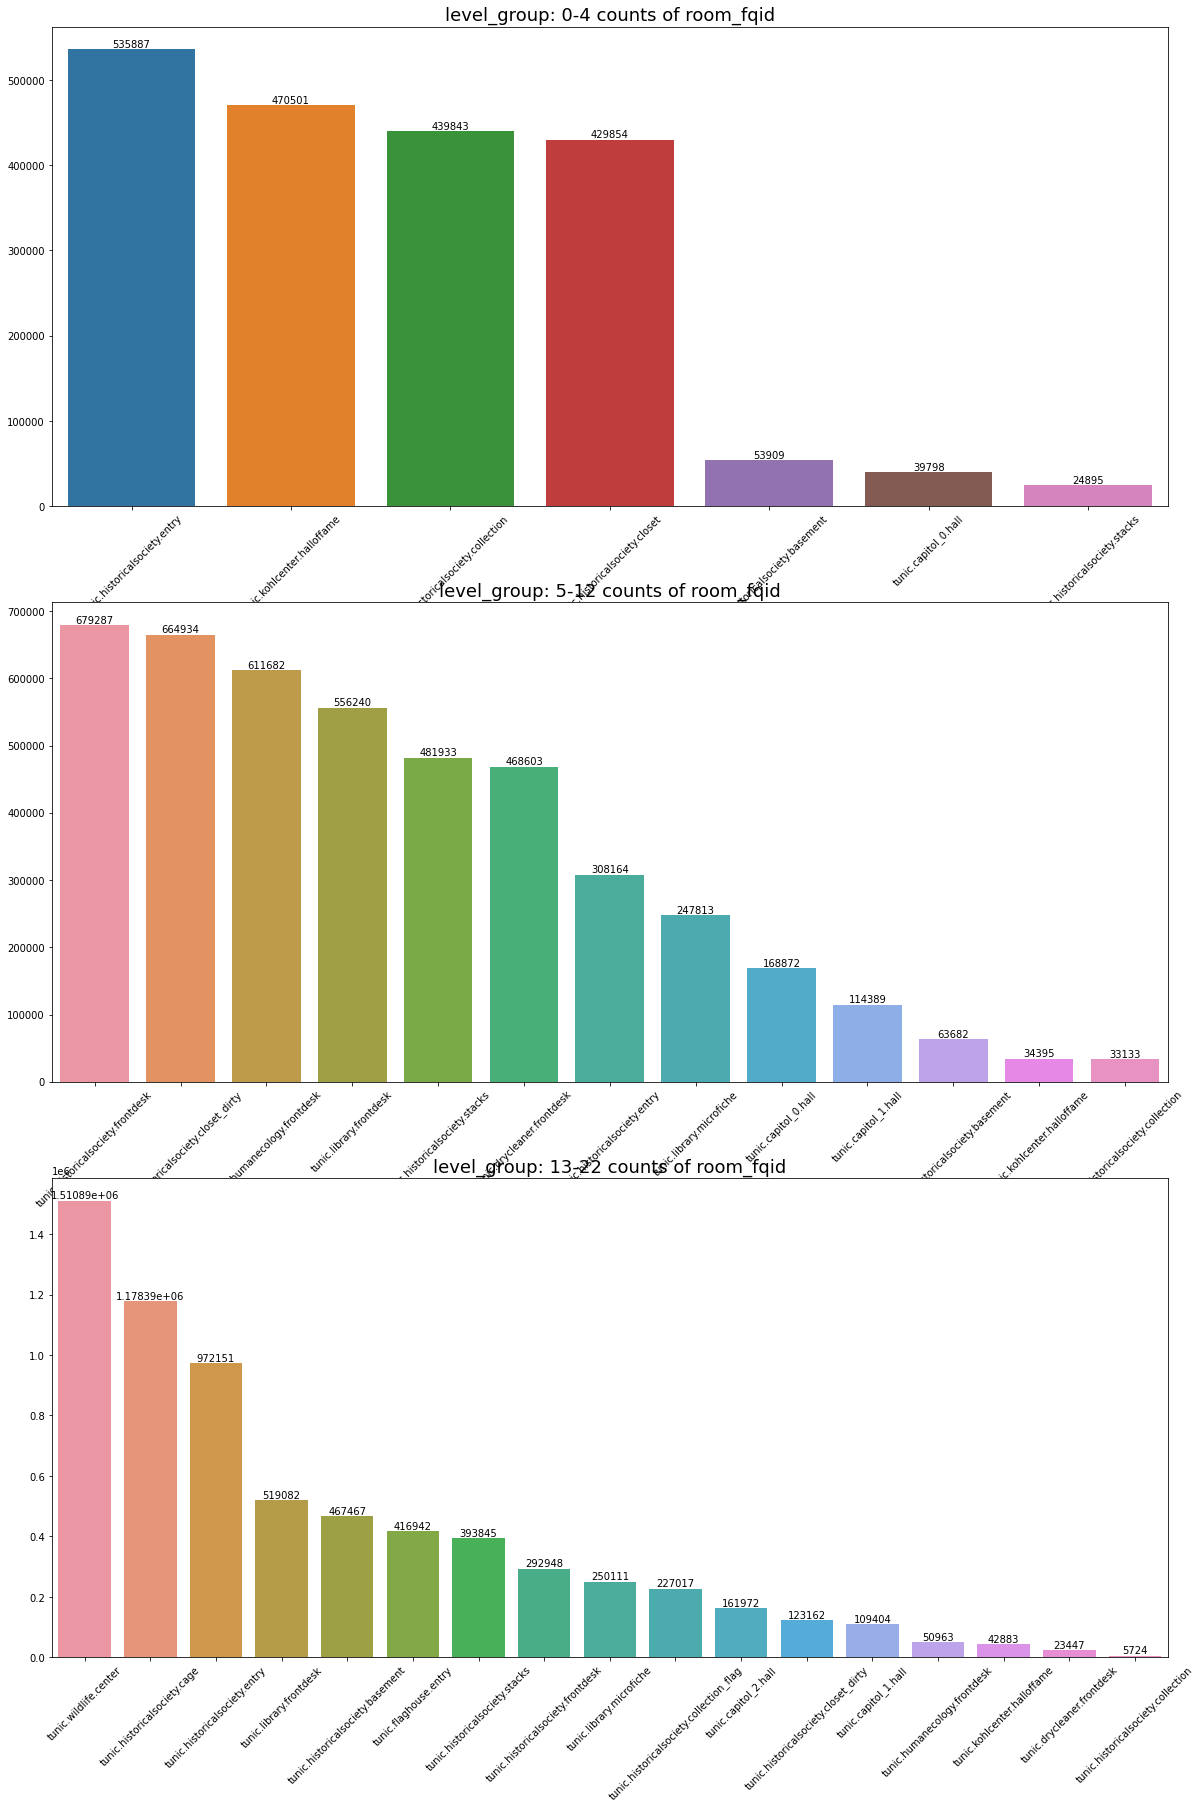

In [43]:
groups = train['level_group'].unique().tolist()
fig,axs = plt.subplots(3,1,figsize=(20,30))
for n in groups:
    temp = train[train['level_group']==n]['room_fqid'].value_counts()
    g = sns.barplot(x = temp.index, y = temp.values, ax = axs[groups.index(n)])
    g.set_title(f'level_group: {n} counts of room_fqid',fontsize=18)
    g.xaxis.set_tick_params(rotation=45)
    g.bar_label(g.containers[0])
plt.show()
del temp,fig,axs,g

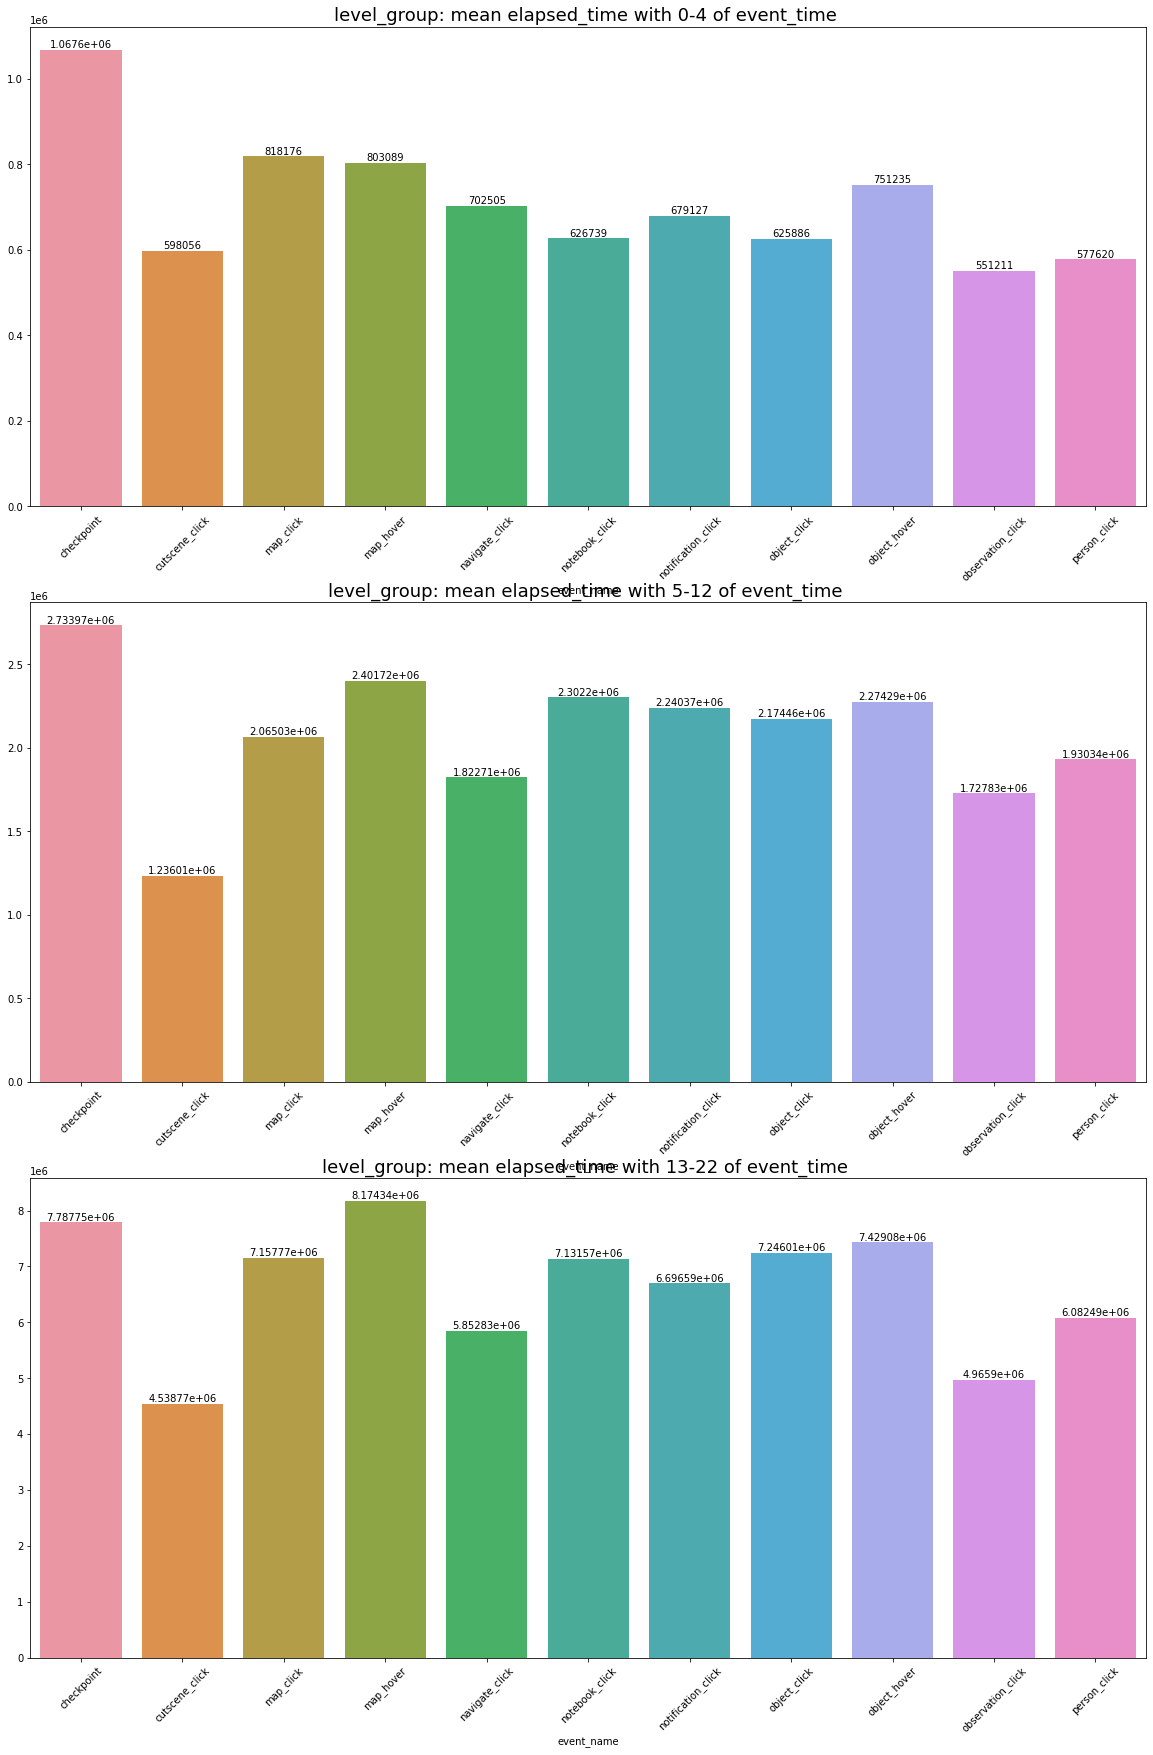

Variance analysis result of event_name and level_group:
                                df        sum_sq       mean_sq    F  PR(>F)
C(event_name)                 10.0  8.876356e+12  8.876356e+11  0.0     NaN
C(level_group)                 2.0  2.122059e+14  1.061029e+14  0.0     NaN
C(event_name):C(level_group)  20.0  6.244441e+12  3.122220e+11  0.0     NaN
Residual                       0.0  2.615868e-15           inf  NaN     NaN


In [26]:
groups = train['level_group'].unique().tolist()
fig,axs = plt.subplots(3,1,figsize=(20,30))
for n in groups:
    temp = train[train['level_group']==n].groupby(by='event_name')['elapsed_time'].mean()
    g = sns.barplot(x = temp.index, y = temp.values, ax = axs[groups.index(n)])
    g.set_title(f'level_group: mean elapsed_time with {n} of event_time ',fontsize=18)
    g.xaxis.set_tick_params(rotation=45)
    g.bar_label(g.containers[0],label = [f'{x.get_height():1f}' for x in g.containers[0]])
plt.show()
table = train.groupby(by=['event_name','level_group'])['elapsed_time'].agg('mean').reset_index()
an = anova_lm(ols('elapsed_time~C(event_name)*C(level_group)',data=table).fit())
print('Variance analysis result of event_name and level_group:')
print(an)
del fig,axs,g,temp

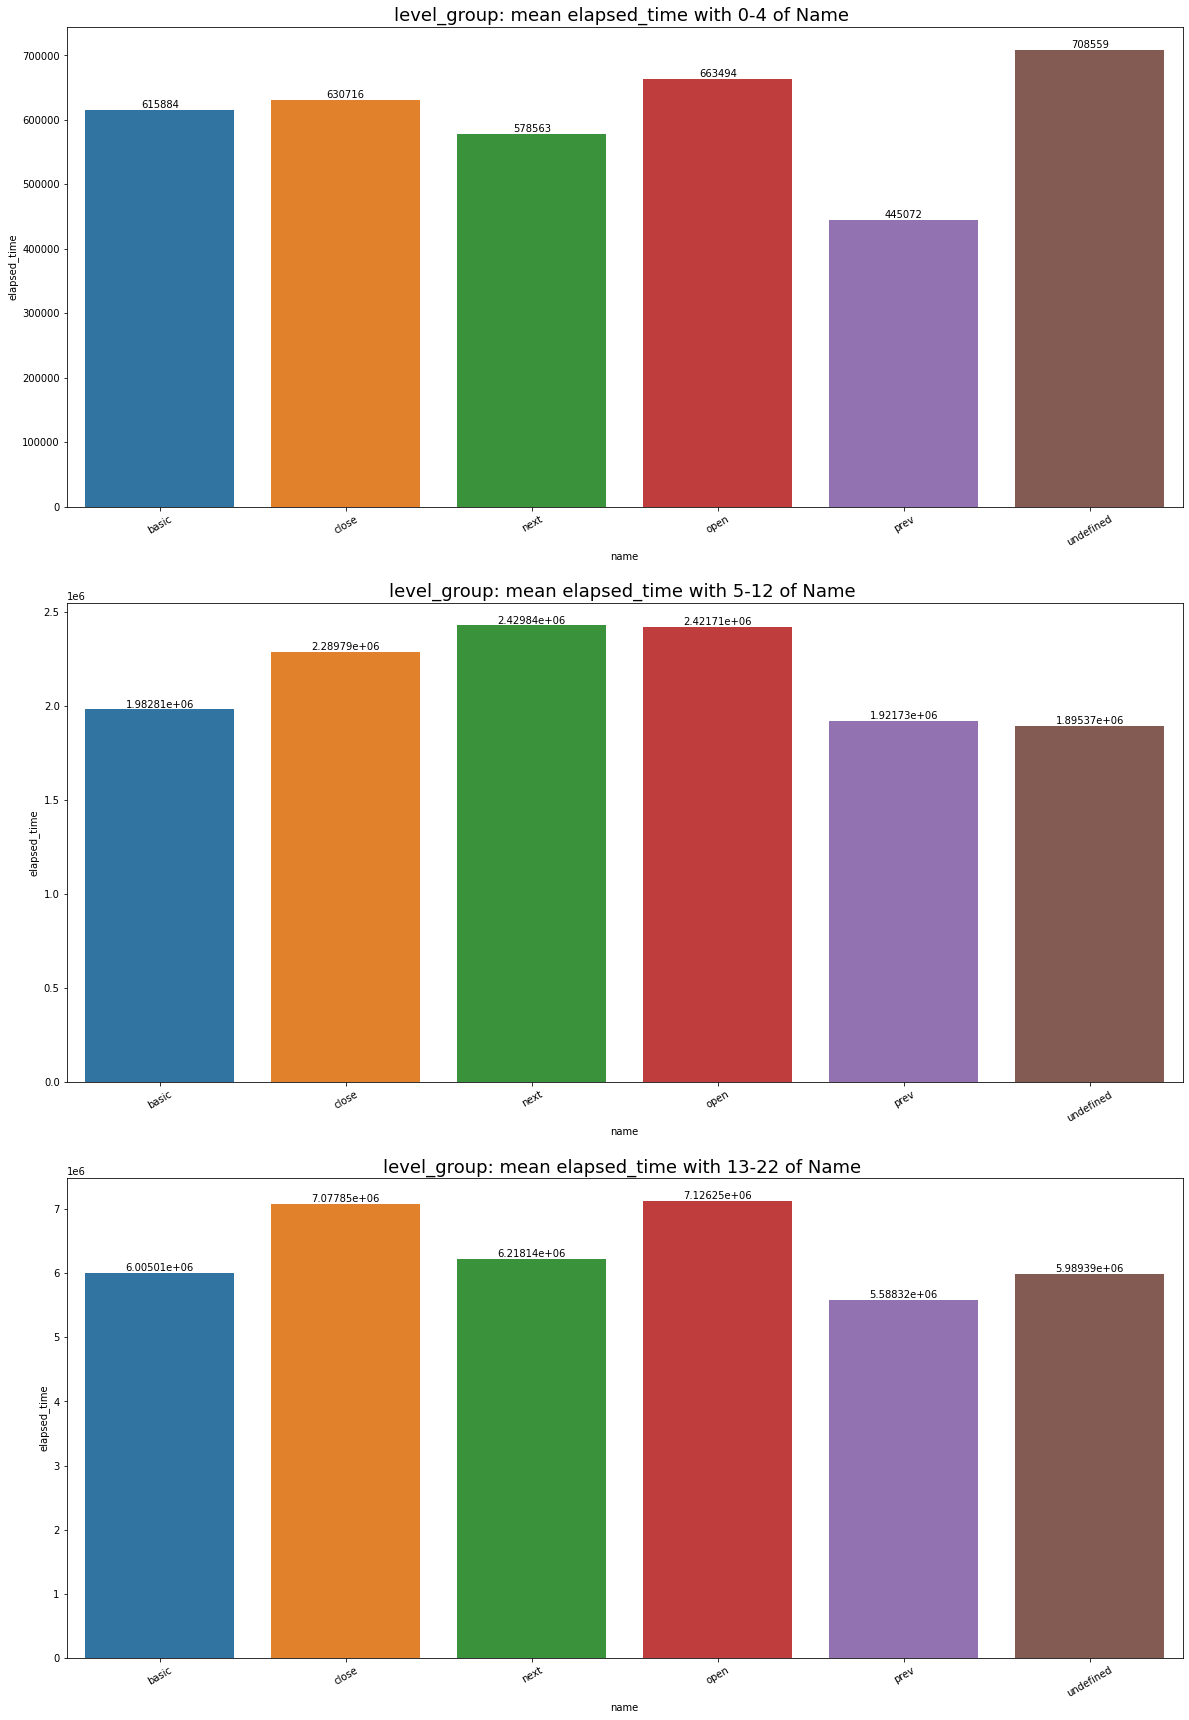

Variance analysis result of name and level_group:
                          df        sum_sq       mean_sq    F  PR(>F)
C(name)                  5.0  1.290716e+12  2.581433e+11  0.0     NaN
C(level_group)           2.0  1.053029e+14  5.265145e+13  0.0     NaN
C(name):C(level_group)  10.0  1.044185e+12  1.044185e+11  0.0     NaN
Residual                 0.0  3.442376e-16           inf  NaN     NaN


In [28]:
fig,axs = plt.subplots(3,1,figsize=(20,30))
for n in groups:
    temp = train[train['level_group']==n].groupby(by='name')['elapsed_time'].mean().reset_index()
    g = sns.barplot(x = temp.name, y = temp.elapsed_time, ax = axs[groups.index(n)])
    g.set_title(f'level_group: mean elapsed_time with {n} of Name ',fontsize=18)
    g.xaxis.set_tick_params(rotation=30)
    g.bar_label(g.containers[0],label = [f'{x.get_height():1f}' for x in g.containers[0]])
plt.show()
table = train.groupby(by=['name','level_group'])['elapsed_time'].agg('mean').reset_index()
an = anova_lm(ols('elapsed_time~C(name)*C(level_group)',data=table).fit())
print('Variance analysis result of name and level_group:')
print(an)
del fig,axs,g,temp,table,an

In [33]:
for n in groups:
    temp = train[train['level_group']==n].groupby(by='name')['elapsed_time'].mean().reset_index()
    print('='*40)
    print('Variance analysis result of name: {}'.format(n))
    print(anova_lm(ols('elapsed_time~C(name)',data = temp).fit()))

Variance analysis result of name: 0-4
           df        sum_sq       mean_sq    F  PR(>F)
C(name)   5.0  4.117638e+10  8.235276e+09  0.0     NaN
Residual  0.0  5.454892e-19           inf  NaN     NaN
Variance analysis result of name: 5-12
           df        sum_sq       mean_sq    F  PR(>F)
C(name)   5.0  3.162938e+11  6.325877e+10  0.0     NaN
Residual  0.0  3.957338e-18           inf  NaN     NaN
Variance analysis result of name: 13-22
           df        sum_sq       mean_sq    F  PR(>F)
C(name)   5.0  1.977431e+12  3.954862e+11  0.0     NaN
Residual  0.0  5.551115e-17           inf  NaN     NaN


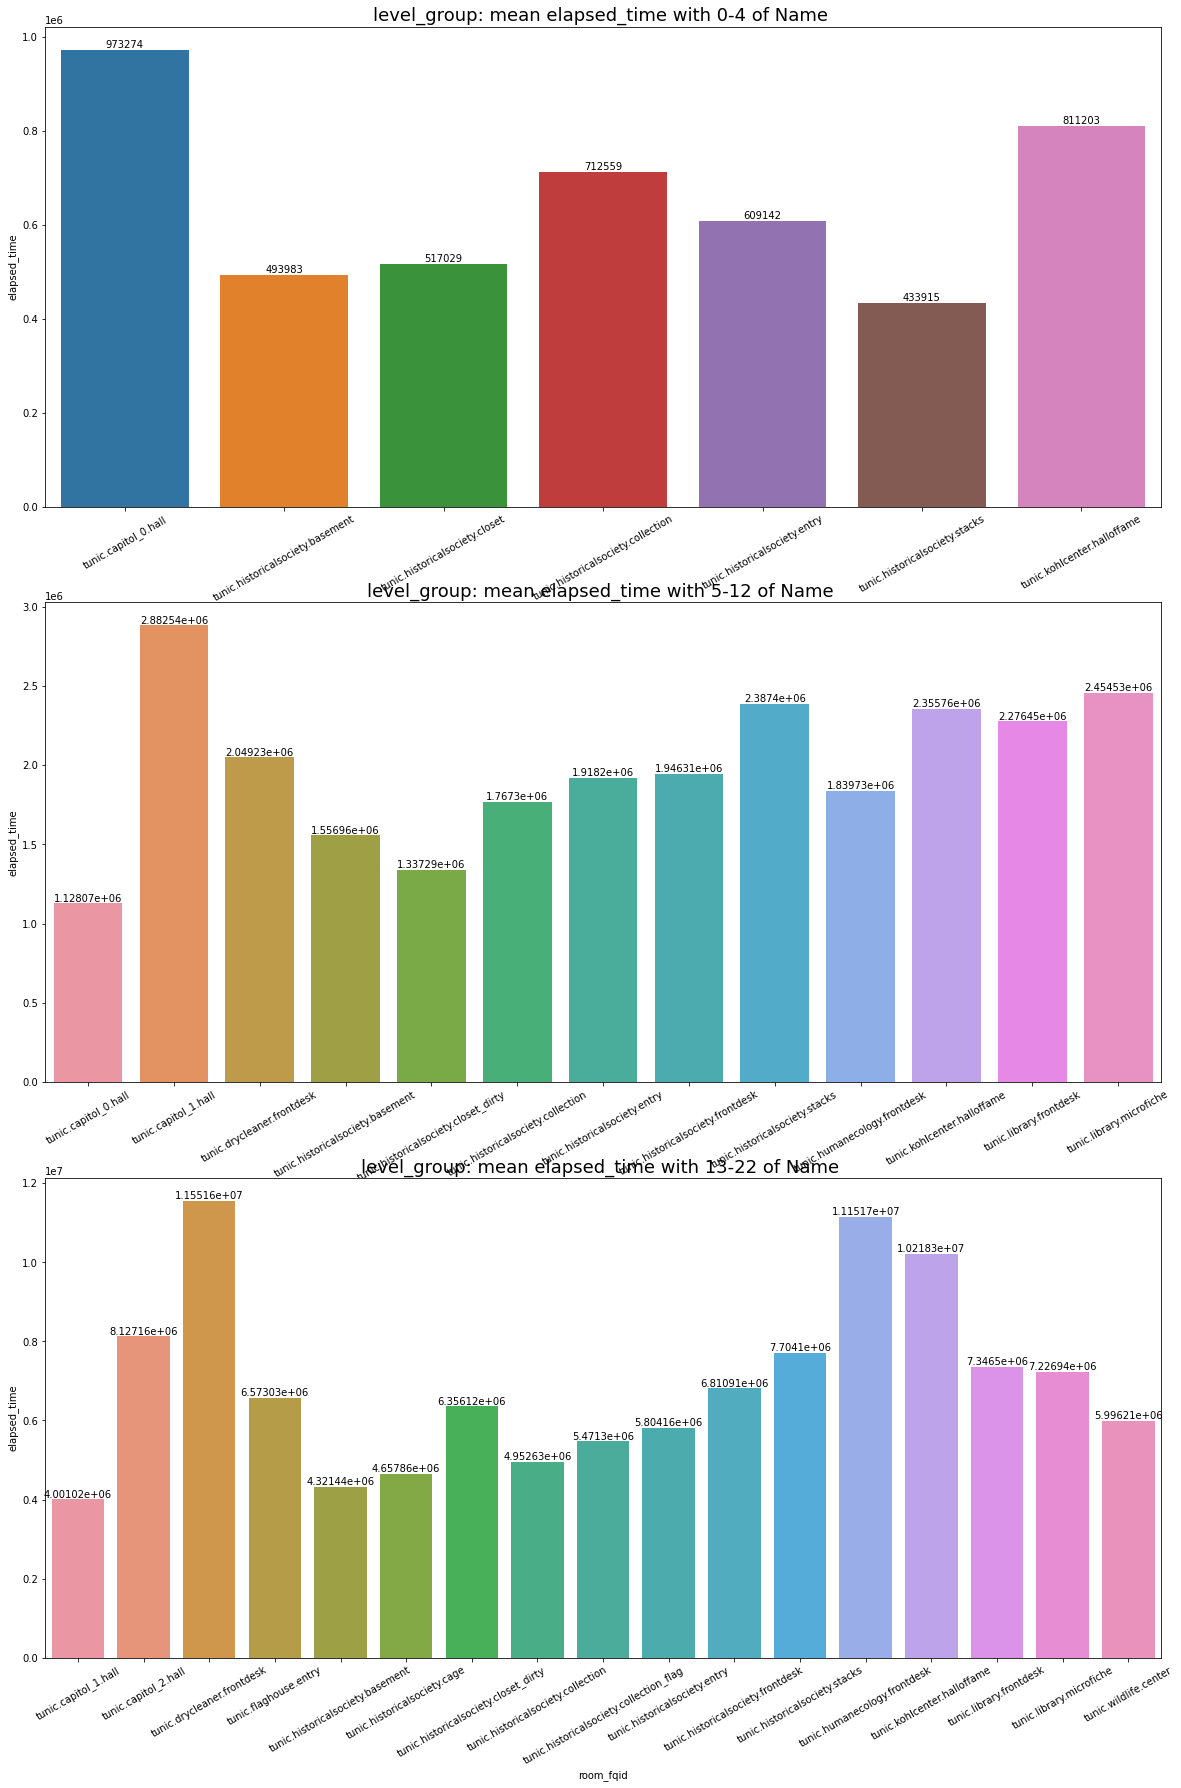

ValueError: shapes (4,57) and (37,) not aligned: 57 (dim 1) != 37 (dim 0)

In [35]:
fig,axs = plt.subplots(3,1,figsize=(20,30))
for n in groups:
    temp = train[train['level_group']==n].groupby(by='room_fqid')['elapsed_time'].mean().reset_index()
    g = sns.barplot(x = temp.room_fqid, y = temp.elapsed_time, ax = axs[groups.index(n)])
    g.set_title(f'level_group: mean elapsed_time with {n} of Name ',fontsize=18)
    g.xaxis.set_tick_params(rotation=30)
    g.bar_label(g.containers[0],label = [f'{x.get_height():.1f}' for x in g.containers[0]])
plt.show()
table = train.groupby(by=['room_fqid','level_group'])['elapsed_time'].agg('mean').reset_index()
an = anova_lm(ols('elapsed_time~C(room_fqid)*C(level_group)',data=table).fit())
print('='*80)
print('Variance analysis result of name and level_group:')
print(an)
del fig,axs,g,temp,table,an